# Projet 7 - Implementation of a scoring model
# Notebook - Model comparison

# Data sources

The webpage containing all data and descriptions: <a href="https://www.kaggle.com/c/home-credit-default-risk/data" target="_blank">here</a>.

# Glossary

__- TP:__ True positives correspond to customers which are classified as they would default the repayment of their loan and they would as expected.<br>
__- FP:__ False positives correspond to customers which were guessed trustless to repay their loans whereas they would have to (Secondary case to avoid and minimize if possible).<br>
__- FN:__ False negatives correspond to customers which were guessed trustful to repay their loans whereas they will not (Worst case to absolutly minimize).<br>
__- TN:__ True negatives correspond to customers which are classified as they would not default the repayment of their loan and they don't as expected.<br>
__- dt_sp:__ Data sampling.<br>
__- wt:__ Weight.<br>
__- opt:__ Optimal.<br>
__- synth_sp:__ Synthetic sampling.<br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Model-comparison" data-toc-modified-id="Notebook---Model-comparison-2">Notebook - Model comparison</a></span></li><li><span><a href="#Data-sources" data-toc-modified-id="Data-sources-3">Data sources</a></span></li><li><span><a href="#Glossary" data-toc-modified-id="Glossary-4">Glossary</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-5">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-5.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Settings-of-global-graphics-parameters" data-toc-modified-id="2)-Settings-of-global-graphics-parameters-5.2">2) Settings of global graphics parameters</a></span></li><li><span><a href="#3)-Global-files'-path" data-toc-modified-id="3)-Global-files'-path-5.3">3) Global files' path</a></span></li><li><span><a href="#4)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="4)-Importation-of-the-preprocessed-datasets-5.4">4) Importation of the preprocessed datasets</a></span></li><li><span><a href="#5)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="5)-Separation-of-the-explicatives-and-the-explicated-5.5">5) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#II)-Models" data-toc-modified-id="II)-Models-6">II) Models</a></span><ul class="toc-item"><li><span><a href="#1)-Importation-of-required-libraries" data-toc-modified-id="1)-Importation-of-required-libraries-6.1">1) Importation of required libraries</a></span></li><li><span><a href="#2)-Global-variables" data-toc-modified-id="2)-Global-variables-6.2">2) Global variables</a></span></li><li><span><a href="#3)-Functions" data-toc-modified-id="3)-Functions-6.3">3) Functions</a></span><ul class="toc-item"><li><span><a href="#a)-Hyperparameter-tuning" data-toc-modified-id="a)-Hyperparameter-tuning-6.3.1">a) Hyperparameter tuning</a></span></li><li><span><a href="#b)-Model-performance-evaluation" data-toc-modified-id="b)-Model-performance-evaluation-6.3.2">b) Model performance evaluation</a></span></li><li><span><a href="#c)-Building-model-pipeline" data-toc-modified-id="c)-Building-model-pipeline-6.3.3">c) Building model pipeline</a></span></li><li><span><a href="#d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models" data-toc-modified-id="d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models-6.3.4">d) Simplification of the hyperparameters tuning and the evaluation of the models</a></span></li></ul></li><li><span><a href="#3)-Preprocessing-for-data-resampling" data-toc-modified-id="3)-Preprocessing-for-data-resampling-6.4">3) Preprocessing for data resampling</a></span></li><li><span><a href="#4)-Modelisation" data-toc-modified-id="4)-Modelisation-6.5">4) Modelisation</a></span><ul class="toc-item"><li><span><a href="#a)-Baseline-model:-Dummy-classifier" data-toc-modified-id="a)-Baseline-model:-Dummy-classifier-6.5.1">a) Baseline model: Dummy classifier</a></span><ul class="toc-item"><li><span><a href="#i.-Libraries-importation" data-toc-modified-id="i.-Libraries-importation-6.5.1.1">i. Libraries importation</a></span></li><li><span><a href="#ii.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="ii.-Evaluation-on-the-cross-validated-train-data-6.5.1.2">ii. Evaluation on the cross validated train data</a></span></li><li><span><a href="#iii.-Generalization-over-the-test-set" data-toc-modified-id="iii.-Generalization-over-the-test-set-6.5.1.3">iii. Generalization over the test set</a></span></li></ul></li><li><span><a href="#b)-Logistic-regressor" data-toc-modified-id="b)-Logistic-regressor-6.5.2">b) Logistic regressor</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.2.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.2.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.2.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.2.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.2.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#c)-Random-forest" data-toc-modified-id="c)-Random-forest-6.5.3">c) Random forest</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.3.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.3.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.3.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.3.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.3.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#d)-XGBoosting" data-toc-modified-id="d)-XGBoosting-6.5.4">d) XGBoosting</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.4.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.4.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.4.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.4.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.4.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#e)-LightGBM" data-toc-modified-id="e)-LightGBM-6.5.5">e) LightGBM</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-6.5.5.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-6.5.5.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-6.5.5.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-6.5.5.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-6.5.5.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#f)-Models-comparison" data-toc-modified-id="f)-Models-comparison-6.5.6">f) Models comparison</a></span><ul class="toc-item"><li><span><a href="#i.-Functions" data-toc-modified-id="i.-Functions-6.5.6.1">i. Functions</a></span></li><li><span><a href="#ii.-Figures" data-toc-modified-id="ii.-Figures-6.5.6.2">ii. Figures</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle


### Data manipulations ###

import numpy as np
from numpy import set_printoptions # Saving full data when exporting to csv format.
import pandas as pd


### Custom functions ###

from shared_functions import *


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Settings of global graphics parameters

In [2]:
### Set default figure parameters for the whole notebook ###

# Default parameters for matplotlib's figures.
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 200
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'r', 'g'])
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Default parameters of seaborn's figures.
sns.set_style('white') # NB: Needs to be above sns.set_theme to properly attend custom_params.
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette='deep', rc=custom_params)

## 3) Global files' path

In [3]:
# Global file paths.
#EXPORTS_DIR_PATH = 'Exports'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
MLFLOW_EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried\MLFlow'
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'

CSV_MODELS_FILE = 'models_info.csv'
PKL_MODELS_FILE = 'models_info.pkl'
#JSON_MODELS_FILE = 'models_info.json'
#DATASETS_DIR_PATH = r'D:\0Partage\MP-P2PNet\MP-Sync\MP-Sync_Pro\Info\OC_DS\Projet 7\Datasets' #os.path.join('D:', '0Partage', 'MP-P2PNet', 'MP-Sync', 'MP-Sync_Pro', 'Info', 'OC_DS', 'Projet 7', 'Datasets')

## 4) Importation of the preprocessed datasets

*NB: Only the 125 000 first customers are selected for training as my computer runs out of memory with more during the hyperparameter tuning steps with RandomizedSearchCV().*

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Load the datatsets.
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))

In [6]:
# Resample the train set with stratification over the TARGET feature.
df_train, _ = train_test_split(df_train, stratify=df_train['TARGET'], test_size=0.50, random_state=0)
df_train = df_train.reset_index(drop=True)

In [7]:
# Remove the customer IDs feature before giving data to the model.
del_features = ['SK_ID_CURR'] #, 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']

df_train = df_train.drop(del_features, axis=1)
df_test = df_test.drop(del_features, axis=1)

In [8]:
%%time

# Turns all categorical columns as int when possible.
df_train = find_int_cols(df_train)
df_test = find_int_cols(df_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123002 entries, 0 to 123001
Columns: 366 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(98), int64(268)
memory usage: 343.5 MB
CPU times: total: 2min 27s
Wall time: 2min 27s


In [9]:
# Reduce the memory load of both datasets for better process performance.
df_train = reduce_memory(df_train)
print()
df_train.info()

print("\n")

df_test = reduce_memory(df_test)
print()
df_test.info()

Initial df memory usage is 343.47 MB for 366 columns
Final memory usage is: 93.26 MB - decreased by 72.8%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123002 entries, 0 to 123001
Columns: 366 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(54), float32(44), int16(63), int32(60), int8(145)
memory usage: 93.3 MB


Initial df memory usage is 171.74 MB for 366 columns
Final memory usage is: 46.57 MB - decreased by 72.9%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61502 entries, 0 to 61501
Columns: 366 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(54), float32(44), int16(62), int32(60), int8(146)
memory usage: 46.6 MB


## 5) Separation of the explicatives and the explicated

In [10]:
X_TRAIN = df_train.drop('TARGET', axis=1)
y_TRAIN = df_train['TARGET']

#X_VALID = df_valid.drop('TARGET', axis=1)
#y_VALID = df_valid['TARGET']

X_TEST = df_test.drop('TARGET', axis=1)
y_TEST = df_test['TARGET']

# II) Models

## 1) Importation of required libraries

In [11]:
# Additional common libraries.
from numpy import argmax, argmin
import math
from random import sample as py_rd_sp # Python random sampling.

# MLFlow for sklearn.
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# sklearn tools ad libraries.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, fbeta_score, confusion_matrix

# Make a sklearn job scorer.
from sklearn.metrics import make_scorer

*NB: In order to calculate the best probability threshold the AUCROC is selected over the AUCPR since the first one focuses on the FP and FN balance (the 2 most important values to consider for this project) while the AUCPR focused exclusively on the positive (minority class) (=> FP) which does not take into account the most relevant value for this project (FN).*

## 2) Global variables

In [12]:
# True: Allows hyperprameter tuning, False: Get the results stored from the last hyperparameters tuning.
HT = True

# For imbalanced data use weight or data sampling.
IMB_PROCESS = 'Weight' #'Weight' #'Resp'


# Global common scaler to use.
SCALER = MinMaxScaler()
if SCALER == None:
    SCALER_PREFIX_LABEL = ''
else:
    SCALER_PREFIX_LABEL = 'scl_'

# Initialize the default cross validation method to use.
SKF_5 = StratifiedKFold(5, shuffle=True, random_state=0)


# Set and initialize the main scorer used for the models comparisons.
MAIN_SCORER_TRAIN_LABEL = 'Job_score_train'
MAIN_SCORER_TEST_LABEL = 'Job_score_test'
MAIN_SCORER_VAL = 0


# Load/create and initialize the dataframe in which store all relevant models' information (best hyperparameters, scores...).
# NB: In case of the creation of the file data=np.full((1,len(l_COL_LABELS)), None) to force dtypes as objects
#     until one of the next added entries (rows) are full then, it will be removed. Otherwise, the np.nan values which will appear
#     within the first row will convert their columns' dtypes to float64 and prevent their replacement
#     by objects such as np.array.
l_COL_LABELS = ['Model_labels', 'Models',
                'yhat_train', 'yhat_test',
                'Best_proba_threshold_train', 'Best_proba_threshold_test',
                MAIN_SCORER_TRAIN_LABEL, MAIN_SCORER_TEST_LABEL, 
                'AUROC_scores_train', 'AUROC_scores_test',
                'F-bêta_score_train', 'F-bêta_score_test',
                'Process_time_train (s)', 'Process_time_test (s)',
                'Confusion_matrix_values_train ([TP, FP, FN, TN])', 'Confusion_matrix_values_test ([TP, FP, FN, TN])'
               ]

# Update the csv file containing the training information and scores of the model or not (True = update, False = create a new one).
GET_CSV_FILE = True
if GET_CSV_FILE:
    try:
        df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')

    except:
        print("No csv models informations were found. A new one is created...")
        df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), ''), columns=l_COL_LABELS).set_index('Model_labels')
        df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
        print('Done !')
    
else:
    print("Creation of a new csv file to store models informations...")
    df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
    df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
    print('Done !')  

display(df_MODELS.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries,  to scl_wt_dummy_clf
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Models                                            2 non-null      object
 1   yhat_train                                        2 non-null      object
 2   yhat_test                                         2 non-null      object
 3   Best_proba_threshold_train                        2 non-null      object
 4   Best_proba_threshold_test                         2 non-null      object
 5   Job_score_train                                   2 non-null      object
 6   Job_score_test                                    2 non-null      object
 7   AUROC_scores_train                                2 non-null      object
 8   AUROC_scores_test                                 2 non-null      object
 9   F-bêta_score_train         

None

In [13]:
df_MODELS

Models  \
Model_labels                                                          
                                                                      
scl_wt_dummy_clf  (MinMaxScaler(), DummyClassifier(strategy='str...   

                                                         yhat_train  \
Model_labels                                                          
                                                                      
scl_wt_dummy_clf  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          yhat_test  \
Model_labels                                                          
                                                                      
scl_wt_dummy_clf  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                 Best_proba_threshold_train Best_proba_threshold_test  \
Model_labels                                                            
                                                                        
scl_wt_dummy_clf                        1.0                       0.0   

                 Job_score_train Job_score_test AUROC_scores_train  \
Model_labels                                                         
                                                                     
scl_wt_dummy_clf        0.532438       0.527802           0.499079   

                 AUROC_scores_test F-bêta_score_train F-bêta_score_test  \
Model_labels                                                              
                                                                          
scl_wt_dummy_clf           0.50058            0.07876          0.081207   

                 Process_time_train (s) Process_time_test (s)  \
Model_labels                                                    
                                                                
scl_wt_dummy_clf               5.904946              5.656197   

                 Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                        
                                                                    
scl_wt_dummy_clf                            [0, 0, 19859, 226145]   

                 Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                      
                                                                  
scl_wt_dummy_clf                    [1608, 18049, 18251, 208096]

## 3) Functions 

### a) Hyperparameter tuning

In [14]:
def hyper_tune_rand_grid (model, X, y, para_grid, scorer, cv, score_label = 'score',
                          n_iter = 100, grid_loop = 1, range_precision = None, rand_state = 0, verbose = 0):
    
    """
    Description
    -----------
    Tune the chosen hyperapameters of the model by checking a random number of combinations with the RandomizedSearchCV() method.
    This function tunes the hyperparameters by taking the best combination among the best one found in each loop run.
    
    Parameters
    ----------
    model: sklearn model
        Model to test.
    X: pandas.Dataframe()
        Dataframe of the explicatives.
    y: pandas.Dataframe()
        Dataframe of the explicated.
    n_folds: int
        Split parameter of the KFold function.
    para_grid: dictionary
        Parameters of the model to tune.
    n_iter: int
        Number of combinations of hyperparameters within which the RandomizedSearchCV will pick the best.
    grid_loop:
        Number of loop run.
    range_precision: int
        Number of decimals to round to.
    int_para_names: list of strings
        Hyperparameters which accept only integers.
    bool_para_names: list of strings
        Hyperparameters which accept only booleans.
    rand_state: int
        random_state parameter in order to fix the randomness of the runs.

    Return: sklearn.RandomizedSearchCV()
    ------
    Returns the fitted randomized model grid.
        
    """      
    
    def show ():
        
        """
        Description
        -----------
        Show relevant information at the end of the process.
        
        """  
        
        # Fit the grid model.
        model_grid.fit(X, y)
        
        # Display the best hyperparameter.
        print("\nBest estimator found:\n", model_grid.best_estimator_)
        print("\nBest score found:\n", score_label, '=', round(model_grid.best_score_, 3))
        print("\nBest hyperparameters found:\n", model_grid.best_params_)  

        
    # Set the KFold cross validation with the selected n_folds.
    #skf = StratifiedKFold(n_folds, shuffle=True, random_state=0)

    # Create a dictionary with all parameters to test as keys and empty lists as values.
    best_para_stored = para_grid.copy()
    for key in best_para_stored.keys():
        best_para_stored[key] = []

    
    for i in range(grid_loop):
               
        # Random search of parameters, use all available cores.
        model_grid = RandomizedSearchCV(estimator=model, param_distributions=para_grid, cv=cv, scoring=scorer,
                                        n_iter=n_iter, refit=True, n_jobs=-1, random_state=rand_state,
                                        verbose=verbose, error_score="raise")
         
        # Fit the random grid.
        # NB: Step needed to be able to get the "best_params_" method unles refit=True.
        model_grid.fit(X, y)#.to_numpy().ravel())

        # Get the best parameters values in a dictionary.
        best_para = model_grid.best_params_
        
        # Loop to store the best parameter got in this loop run, in order to make the average at the end of all runs.
        for key in best_para_stored.keys():
            
            # Get the best value for the "key" parameter.
            if range_precision != None:
                best_para_value = round(best_para.get(key), range_precision)
            else:
                best_para_value = best_para.get(key)
            
            # Store this value in the dictionary set at the beginning of the function ("best_para_stored").
            best_para_stored[key].append(best_para_value)
            
            # Remove duplicates.
            best_para_stored[key] = list(set(best_para_stored[key]))
    

    # Replace the initial parameters with the best ones found.
    para_grid = best_para_stored
    
    # Find the best parameter among the best found.
    model_grid = GridSearchCV(estimator=model, param_grid=para_grid, cv=cv, scoring=scorer, n_jobs=-1, verbose=verbose)
    
    # Show results.
    show()
        
    return model_grid

### b) Model performance evaluation

In [15]:
def evaluate (y_pred_proba_P, y_true = y_TEST, fig = (1,1,1,1), l_model_labels = ['Model']):
    
    """ Evaluate the model and draw the corresponding figures. """
    
    global MAIN_SCORER_VAL
    
    ### Calculate necessary variables.
    
    # List of the probability thresholds to try.
    l_proba_thrs = np.linspace(0, 1, num=201)
    
    # Get the predictions corresponding to each probability thresholds tried.
    l_y_pred = get_y_pred_list(y_pred_proba_P, l_proba_thrs)
    
    # Get the corresponding TP, FP, FN and TN for each probability thresholds tried.
    np_tp, np_fp, np_fn, np_tn = np.array(get_tp_fp_fn_tn_lists(y_true, l_y_pred))
    
    # FN cost coefficient (FN ~ 10 FP).
    fn_cost_coeff = 10
    
    # Display figures configuration.
    n_fig = fig.count(1)
    
    if n_fig != 0:
        plt.figure(figsize=(12,12), dpi=300)
        p = 0
        if n_fig == 1:
            l = 1; c = 1
        elif n_fig == 2:
            l = 1; c = 2
        elif n_fig >= 3:
            l = 2; c = 2  
    
    
    ### Calculate the optimal probability threshold.
    
    # Calculate the optimal threshold.
    model_best_thr, best_thr_idx = opt_proba_thr(np_tp, np_fp, np_fn, np_tn, l_proba_thrs)    
    
    # Plot figures.
    if fig[0]:
        p += 1 
        plt.subplot(l,c,p)
        figure_density(y_true, y_pred_proba_P, model_best_thr)
    
    if fig[1]:
        p += 1 
        plt.subplot(l,c,p)
        figure_sum_fp_coeff_fn(np_fp, np_fn, l_proba_thrs, model_best_thr, fn_cost_coeff)
    
    
    ### Calculate scores.
    
    # ROC AUC score.
    roc_auc_s = roc_auc_score(y_true, y_pred_proba_P)
    print('\nROC-AUC = %f' % roc_auc_s) #%.3f
    
    # Plot figure.
    if fig[2]:
        p += 1 
        plt.subplot(l,c,p)
        figure_roc(y_true, [y_pred_proba_P], l_model_labels)
    
    
    # F-bêta score.
    # NB: Square beta = cost FN / cost FP = 10
    square_beta = 2.5
    beta = round(math.sqrt(square_beta), 2)
      
    # Calculate the F-bêta score for each probability thresholds tried.
    l_fbeta = []
    for y_pred in l_y_pred:
        fbeta = fbeta_score(y_true, y_pred, beta=beta)
        l_fbeta.append(fbeta)
    fbeta = get_fbeta_score(l_proba_thrs, l_fbeta, beta, model_best_thr, best_thr_idx)

    # Plot figure.
    if fig[3]:
        p += 1 
        plt.subplot(l,c,p)
        figure_fbeta_score(l_proba_thrs, l_fbeta, model_best_thr)
    
    
    # Job score.
    g_norm = gain_norm(y_true, l_y_pred[best_thr_idx])
    MAIN_SCORER_VAL = g_norm
    print("Job score: %.3f" % g_norm)
  
    
    print("\n" + "-" * 100 + "\n")
    # Draw figures.
    if fig != (0,0,0,0):
        plt.show()
        
        
    # Confusion matrix.
    print("Confusion matrix:")
    figure_confusion_matrix(y_true, l_y_pred[best_thr_idx])
        
    return model_best_thr, g_norm, roc_auc_s, fbeta, [np_tp[best_thr_idx], np_fp[best_thr_idx], np_fn[best_thr_idx], np_tn[best_thr_idx]]

### c) Building model pipeline

In [16]:
def select_model_label (imb_process, label_root, scaler_prefix_label = SCALER_PREFIX_LABEL):
    
    """ Build the label to associate to the model. """
    
    if imb_process == 'Resp':
        model_label = scaler_prefix_label + 'resp_' + label_root
    elif imb_process == 'Weight':
        model_label = scaler_prefix_label + 'wt_' + label_root
    else:
        model_label = label_root
    
    return model_label

In [17]:
def set_model_pipeline (model, scaler, imb_process):
    
    """ Set the model's pipeline. """
    
    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    pipe_vars = []
    if scaler != None:
        pipe_vars.append(('scaler', scaler))
            
    if imb_process == 'Resp':
        pipe_vars.append(['resampler', BorderlineSMOTE(random_state=0)]) #SMOTE(random_state=0)
        pipe_vars.append(['model', model])
    else:
        pipe_vars.append(['model', model])
                            
    model_pl = Pipeline(pipe_vars)
        
    return model_pl

### d) Simplification of the hyperparameters tuning and the evaluation of the models

In [18]:
"""def block_build_model_pl (model, imb_process = IMB_PROCESS, scaler = SCALER):
    
    # Way to manage imbalanced data.
    imb_process = None

    # Create the label of the model.
    model_label = select_model_label(imb_process, 'dummy_clf')

    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    model_pl = set_model_pipeline(model, scaler, imb_process)
        
    return model_pl, model_label"""

"def block_build_model_pl (model, imb_process = IMB_PROCESS, scaler = SCALER):\n    \n    # Way to manage imbalanced data.\n    imb_process = None\n\n    # Create the label of the model.\n    model_label = select_model_label(imb_process, 'dummy_clf')\n\n    # Initiliaze the model or the pipeline with its default values.\n    # NB: scaler = MinMaxScaler() as binary categories won't be changed and\n    #     the distance between all other values of a feature will be kept.\n    model_pl = set_model_pipeline(model, scaler, imb_process)\n        \n    return model_pl, model_label"

In [19]:
def block_hyperparams_tune (df = df_MODELS, X = X_TRAIN, y = y_TRAIN, cv = SKF_5, tune = HT,
                            n_iter = 20, grid_loop = 1, range_precision = None, rand_state = 0,
                            verbose = 2, model_label = 'model_label'):
    
    """ Section block which tunes the model hyperparameters and select the best ones or load an already tuned model. """
    
    # Tune the hyperparameters of the model.
    # NB: Verbose displays within the terminal of the server session.
    if tune:
        model_grid = hyper_tune_rand_grid(model_pl, X, y, hyperparams_grid, g_norm_scorer, cv, score_label='g_norm',
                                          n_iter=n_iter, grid_loop=grid_loop, range_precision=range_precision,
                                          rand_state=rand_state, verbose=verbose)

        # Get the model set with the best hyperparameters found.
        model_pl_opt = model_grid.best_estimator_

    # Load the last values calculated for the hyperparameters.
    else:
        df = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
        model_pl_opt = df.loc[model_label, 'Models']
    
    return model_pl_opt

In [20]:
def block_evaluate (model_pl, df, model_label, X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                    eval_dataset = 'valid_set', get_csv_file = GET_CSV_FILE):

    """ Section block which fits, predicts, evaluates then, stores the model with its relevant scores and attributes. """
    
    # Train the model and get its predictions probabilities.
    y_pred_proba_NP, process_time = model_fit_predict(model_pl, X_TRAIN, y_TRAIN, SKF_5)

    # Evaluate the model.
    best_thr, g_norm, rocauc, fbeta, cm_vals = evaluate(y_pred_proba_NP[:,1], y_true=y_TRAIN)
    
    # Store the relevant values in the model storage dataframe.
    l_vars = [model_label, model_pl, y_pred_proba_NP[:,1], best_thr, g_norm, rocauc, fbeta, process_time, cm_vals]

    # Update the csv file if the main score is higher and the user allowed it.
    print("\n" + "-" * 100 + "\n")
    df = update_sum_table(df, l_vars, get_csv_file, eval_dataset, MAIN_SCORER_VAL, l_COL_LABELS)
    
    
    # Save also the model scores and itself in a MLFlow log file.
    # NB: Log artifacts (ex: mlflow.log_artifacts(figure_dir, "figure_label")) could also be used to 
    #     add corresponding graphics to the logs of the model.
#    with mlflow.start_run():
        
        # Log model.
#        model_signature = infer_signature(X, y)
#        mlflow.sklearn.log_model(model_pl, model_label + eval_dataset, signature=model_signature)
        
        # Log model's hyperparameters.
#        mlflow.log_params(model_pl.get_params())
        
        # Log metrics.
        #mlflow.log_metric("yhat_P", y_pred_proba_NP[:,1])
#        mlflow.log_metric("best_thr", best_thr)
#        mlflow.log_metric("job_score", g_norm)
#        mlflow.log_metric("auroc", rocauc)
#        mlflow.log_metric("fbeta", fbeta)
#        mlflow.log_metric("process_time", process_time)
#        mlflow.log_metric("TP", cm_vals[0])
#        mlflow.log_metric("FP", cm_vals[1])
#        mlflow.log_metric("FN", cm_vals[2])
#        mlflow.log_metric("TN", cm_vals[3])

    # [Test] Save also the model alone with MLFlow.
    # NB: Cannot overwrite an existing file.
    #mlflow.sklearn.save_model(model_pl, MLFLOW_EXPORTS_MODELS_DIR_PATH + "_" + model_label)

    return df

## 3) Preprocessing for data resampling

*NB: SMOTE should be applied on the train set only.*

In [21]:
from imblearn.pipeline import Pipeline # NB: imbalearn.pipeline.Pipeline allows to properly deal the SMOTE on the train set and avoid the validation/test sets.
from imblearn.over_sampling import SMOTENC, SMOTE, BorderlineSMOTE # NB: SMOTENC can manage categorial features while SMOTE cannot.

In [22]:
# Create a mask which will indicate SMOTENC which features it should consider as a category.
# NB: In practice the trick is to consider all "int" columns as categories in order to force SMOTE
#     to avoid to return float values for these columns.
l_CAT_COLS = []
l_CAT_COLS_MASK = []
for col in X_TRAIN.columns:
    col_type = X_TRAIN[col].dtypes
    if col_type != object:
        if str(col_type)[:3] == 'int':
            l_CAT_COLS.append(col)
            l_CAT_COLS_MASK.append(True)
        else:
            l_CAT_COLS_MASK.append(False)

print("List of names of the %i categorical features:\n %s" % (len(l_CAT_COLS), l_CAT_COLS))

List of names of the 267 categorical features:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DOCUMENT_COUNT', 'NEW_DOC_KURT', 'AGE_RANGE', 'BUREAU_SK_ID_BUREAU_NUNIQUE', 'BUREAU_DAYS_CREDIT_MIN', 'BUREAU_DAYS_CREDIT_MAX', 'BUREAU_DAYS_CREDIT_MEAN', 'BUREAU_DAYS_CREDIT_ENDDATE_MIN', 'BUREAU_DAYS_

In [23]:
display_EZ(df_train[l_CAT_COLS])

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  AMT_INCOME_TOTAL  \
0                        0            1             1            157500   
1                        0            0             1             76500   
2                        0            1             0            360000   
3                        0            0             0            225000   
4                        0            1             0            180000   
...                    ...          ...           ...               ...   
122997                   0            1             1            315000   
122998                   1            0             1            157500   
122999                   0            0             1            157500   
123000                   0            1             0             72000   
123001                   0            1             0             81000   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0                733500                0                 0   
1                135000                0                 0   
2                868500                0                 3   
3               1350000                0                 0   
4                238500                0                 2   
...                 ...              ...               ...   
122997           900000                0                 0   
122998           405000                0                 0   
122999          1026000                0                 0   
123000           225000                0                 0   
123001            90000                0                 3   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                         0                   2                  0   
1                         0                   1                  0   
2                         0                   3                  0   
3                         0                   2                  0   
4                         0                   0                  0   
...                     ...                 ...                ...   
122997                    2                   1                  0   
122998                    0                   1                  0   
122999                    0                   1                  0   
123000                    3                   0                  0   
123001                    0                   4                  0   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0           -19890          -1232              -6560            -3441   
1           -15110          -2720              -5436            -5688   
2           -21903          -1663              -4928            -3928   
3           -21729          -4248              -3260            -4601   
4           -14127          -1664               -556            -4832   
...            ...            ...                ...              ...   
122997      -13430          -1150               -789            -4397   
122998      -19230          -3112              -5584            -1842   
122999      -17554           -533              -2294               -1   
123000      -19666          -2316              -9096            -3180   
123001      -21246          -1663              -5368            -3024   

        FLAG_WORK_PHONE  OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0                     1               11                     2   
1                     0                4                     2   
2                     0               -1                     2   
3                     1                0                     3   
4                     0                2                     2   
...                 ...              ...                   ...   
122997                1                5                     3   
122998                0                0                     2   
122999                0                0          

In [24]:
# Create the models.
smote_nc = SMOTENC(categorical_features=l_CAT_COLS_MASK, random_state=0)

# Create the model's pipeline.
smote_nc_pipe = Pipeline([('scaler', StandardScaler(copy=True)),
                          ('resampler', smote_nc)]
                        )

# Show the pipeline hyperparameters. 
pprint(smote_nc_pipe.get_params(), compact=True)

{'memory': None,
 'resampler': SMOTENC(categorical_features=[True, True, True, True, False, False, True, True,
                              True, True, True, True, False, True, True, True,
                              True, True, True, True, True, True, True, True,
                              True, True, False, False, True, True, ...],
        random_state=0),
 'resampler__categorical_features': [True, True, True, True, False, False, True,
                                     True, True, True, True, True, False, True,
                                     True, True, True, True, True, True, True,
                                     True, True, True, True, True, False, False,
                                     True, True, True, True, True, True, True,
                                     True, True, True, True, True, True, False,
                                     False, False, False, False, False, False,
                                     False, False, False, False, False, Fa

In [25]:
# Set the SMOTE hyperparameters range.
k_neighbors = [int(x) for x in np.linspace(start=3, stop=10, num=5)]
sampling_strategy = [round(x, 2) for x in np.linspace(start=0.2, stop=1.0, num=5)]

# Generate the grid.
SMOTE_GRID = ({'resampler__k_neighbors': k_neighbors,
               'resampler__sampling_strategy': sampling_strategy
              })

**/!\ Finally the following this part was not used as SMOTENC() does not work with RandomizedSearchCV() (scorers returns NaN and sometimes memory problems occur). Nevertheless, it should not be much of a problem as integer columns should be able to only accept integers and so force SMOTE to return integer values or trunc float to integer and after the normalization (MinMaxScaler()) only binary categories will remain integers /!\ .**

__- Annexe__

In [26]:
### Method to normalize selected columns.

#from sklearn.compose import ColumnTransformer

#l_NUM_COLS = X_TRAIN.columns[~np.array(l_CAT_COLS_MASK)]
#num_cols_norm = ColumnTransformer([('num_cols', StandardScaler(), l_NUM_COLS),
#                                   ('cat_cols', 'passthrough', l_CAT_COLS)]) #NB: 'passthrough' allows to ignore the set columns.

#df = pd.DataFrame(MinMaxScaler().fit_transform(X_TRAIN), columns=X_TRAIN.columns)
#display_EZ(df[l_CAT_COLS])

## 4) Modelisation

### a) Baseline model: Dummy classifier

#### i. Libraries importation

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
# Initiliaze the model with its default values.
model = DummyClassifier(strategy="stratified")

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'dummy_clf')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', DummyClassifier(strategy='stratified')]])

#### ii. Evaluation on the cross validated train data


ROC-AUC = 0.499501
F-Bêta score of the optimal threshold found = 0.000
Highest F-Bêta score = 0.079
Job score: 0.532

----------------------------------------------------------------------------------------------------



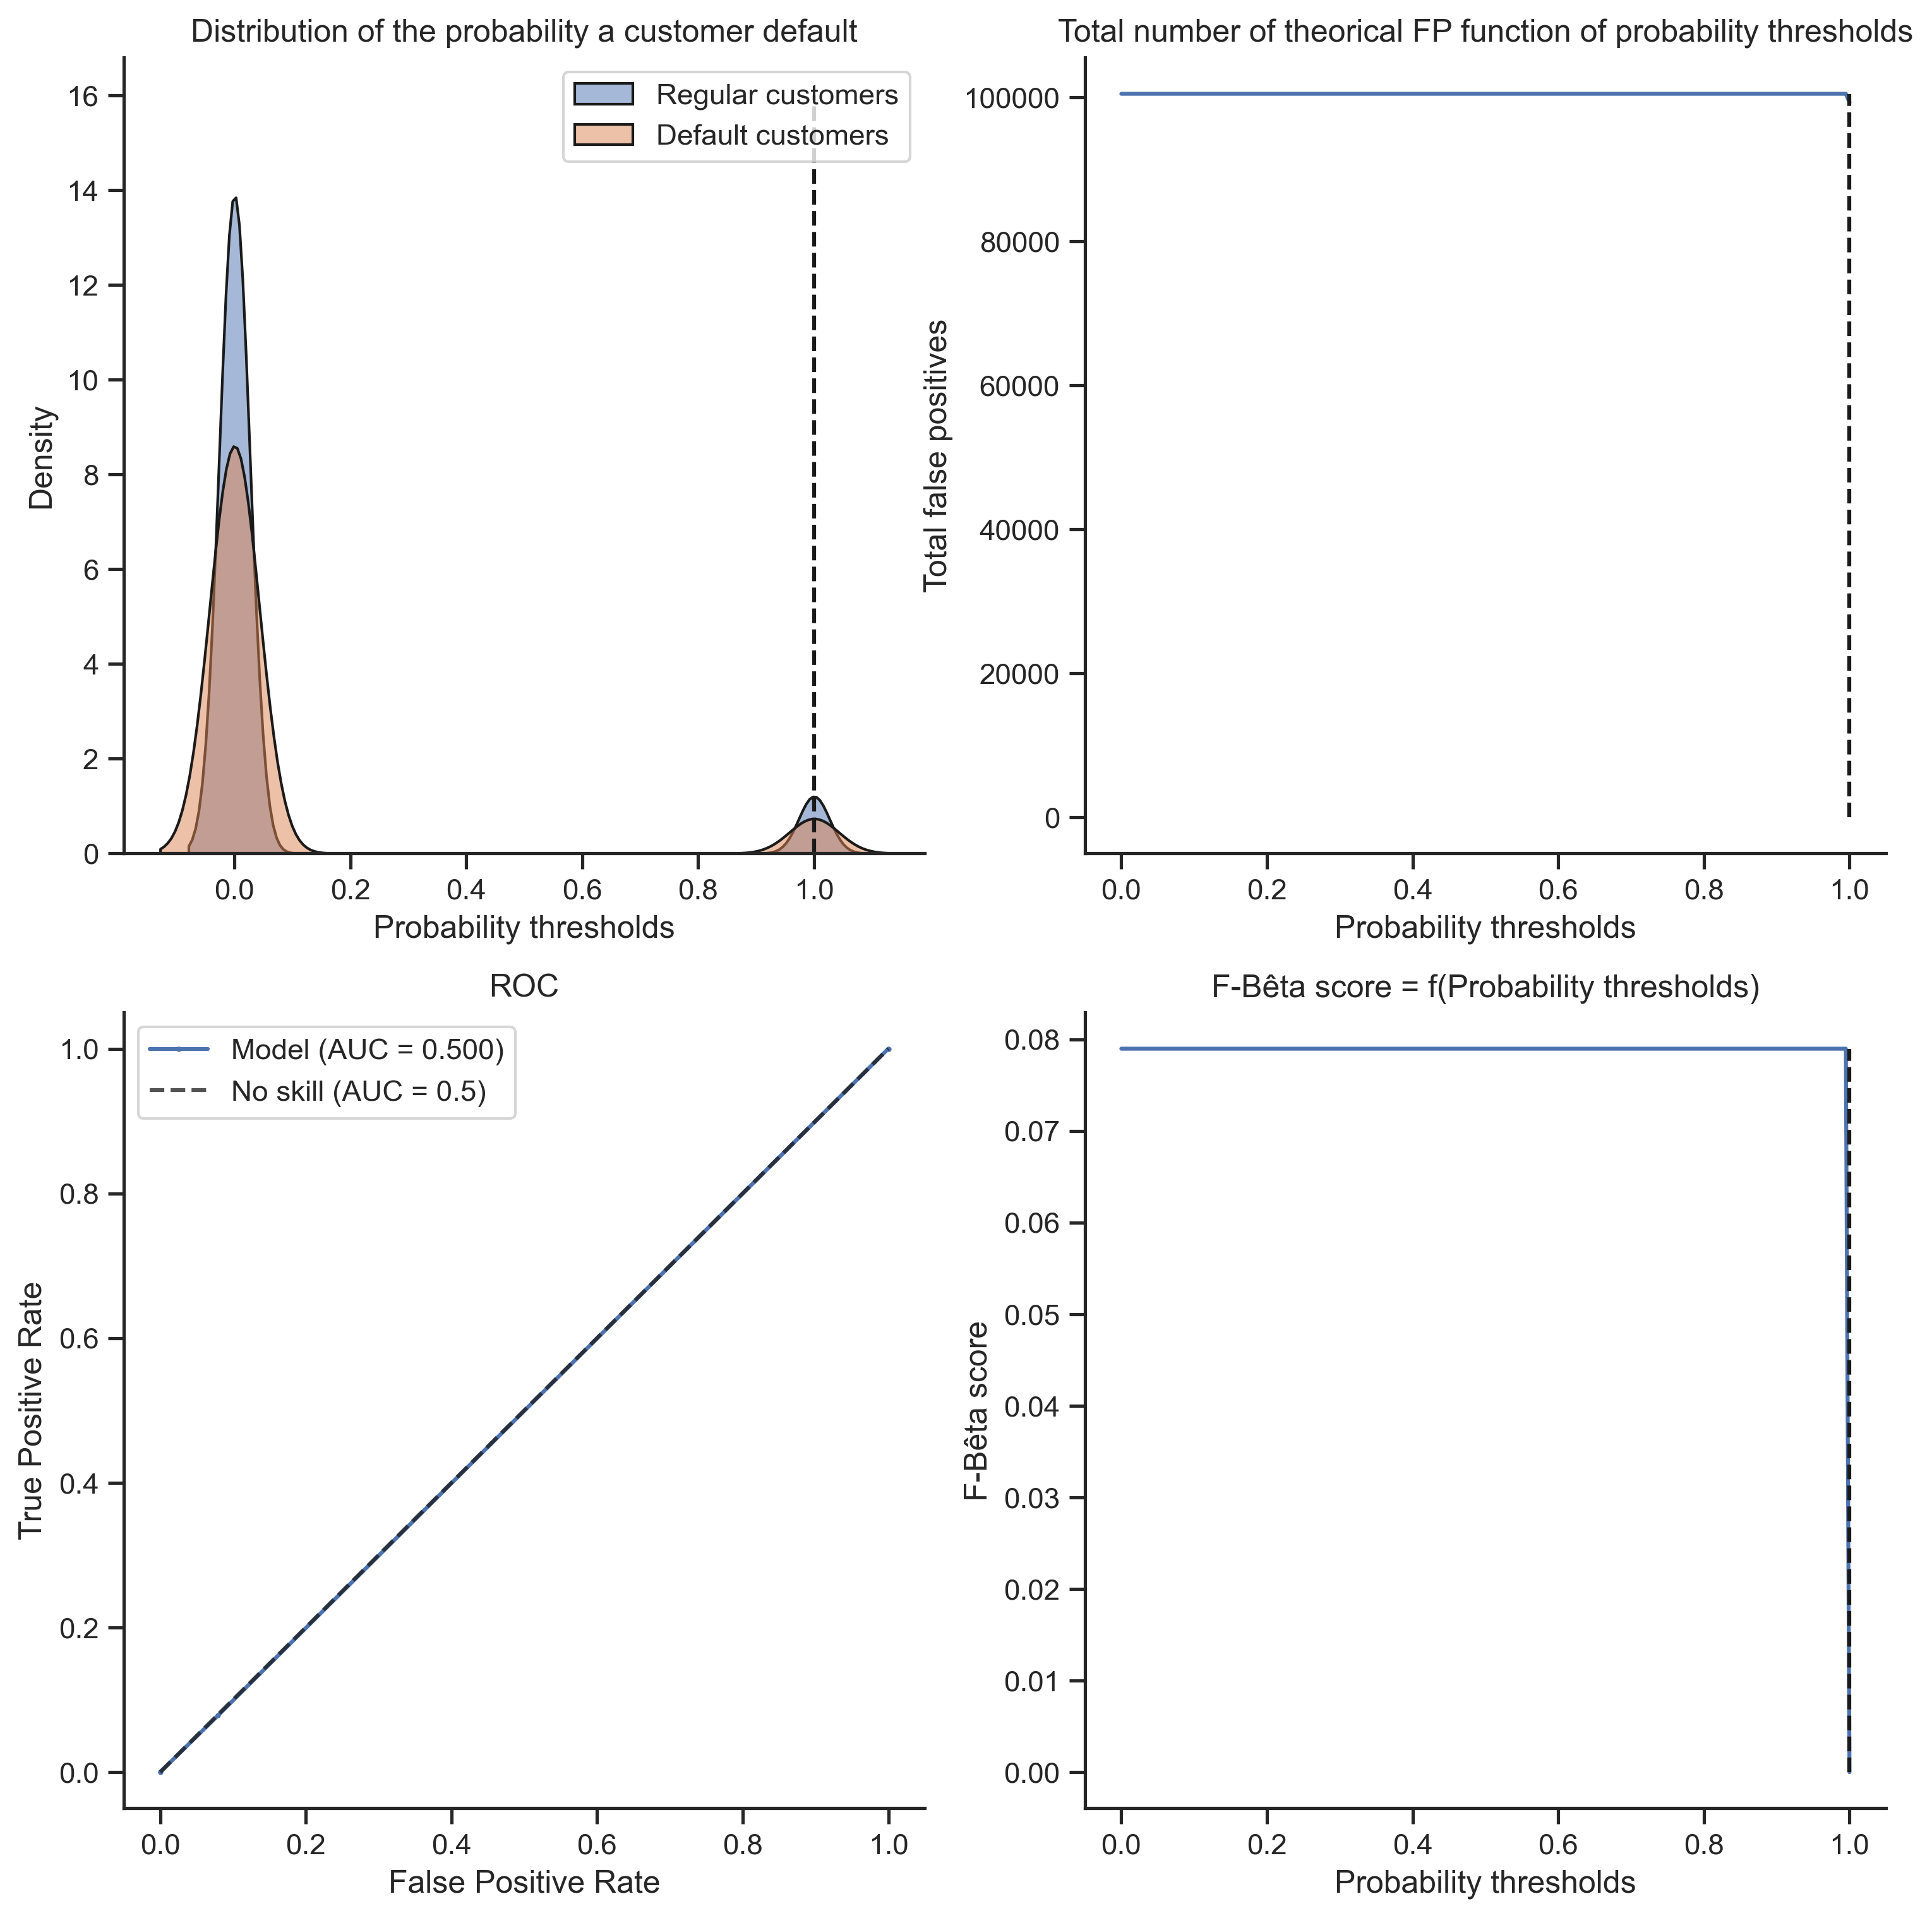

Confusion matrix:



----------------------------------------------------------------------------------------------------

Initial df memory usage is 0.00 MB for 15 columns
Final memory usage is: 0.00 MB - decreased by 50.7%
Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                          
scl_wt_dummy_clf  (MinMaxScaler(), DummyClassifier(strategy='str...   

                                                         yhat_train  \
Model_labels                                                          
scl_wt_dummy_clf  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   

                                                          yhat_test  \
Model_labels                                                          
scl_wt_dummy_clf  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                  Best_proba_threshold_train  Best_proba_threshold_test  \
Model_labels                                                              
scl_wt_dummy_clf                         1.0                        0.0   

                  Job_score_train  Job_score_test  AUROC_scores_train  \
Model_labels                                                            
scl_wt_dummy_clf         0.532424        0.527832            0.499501   

                  AUROC_scores_test  F-bêta_score_train  F-bêta_score_test  \
Model_labels                                                                 
scl_wt_dummy_clf           0.500488            0.078976           0.081177   

                  Process_time_train (s)  Process_time_test (s)  \
Model_labels                                                      
scl_wt_dummy_clf                2.794142                5.65625   

                 Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                        
scl_wt_dummy_clf                             [0, 0, 9930, 113072]   

                 Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                      
scl_wt_dummy_clf                    [1608, 18049, 18251, 208096]

In [29]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### iii. Generalization over the test set


ROC-AUC = 0.498437
F-Bêta score of the optimal threshold found = 0.000
Highest F-Bêta score = 0.078
Job score: 0.532

----------------------------------------------------------------------------------------------------



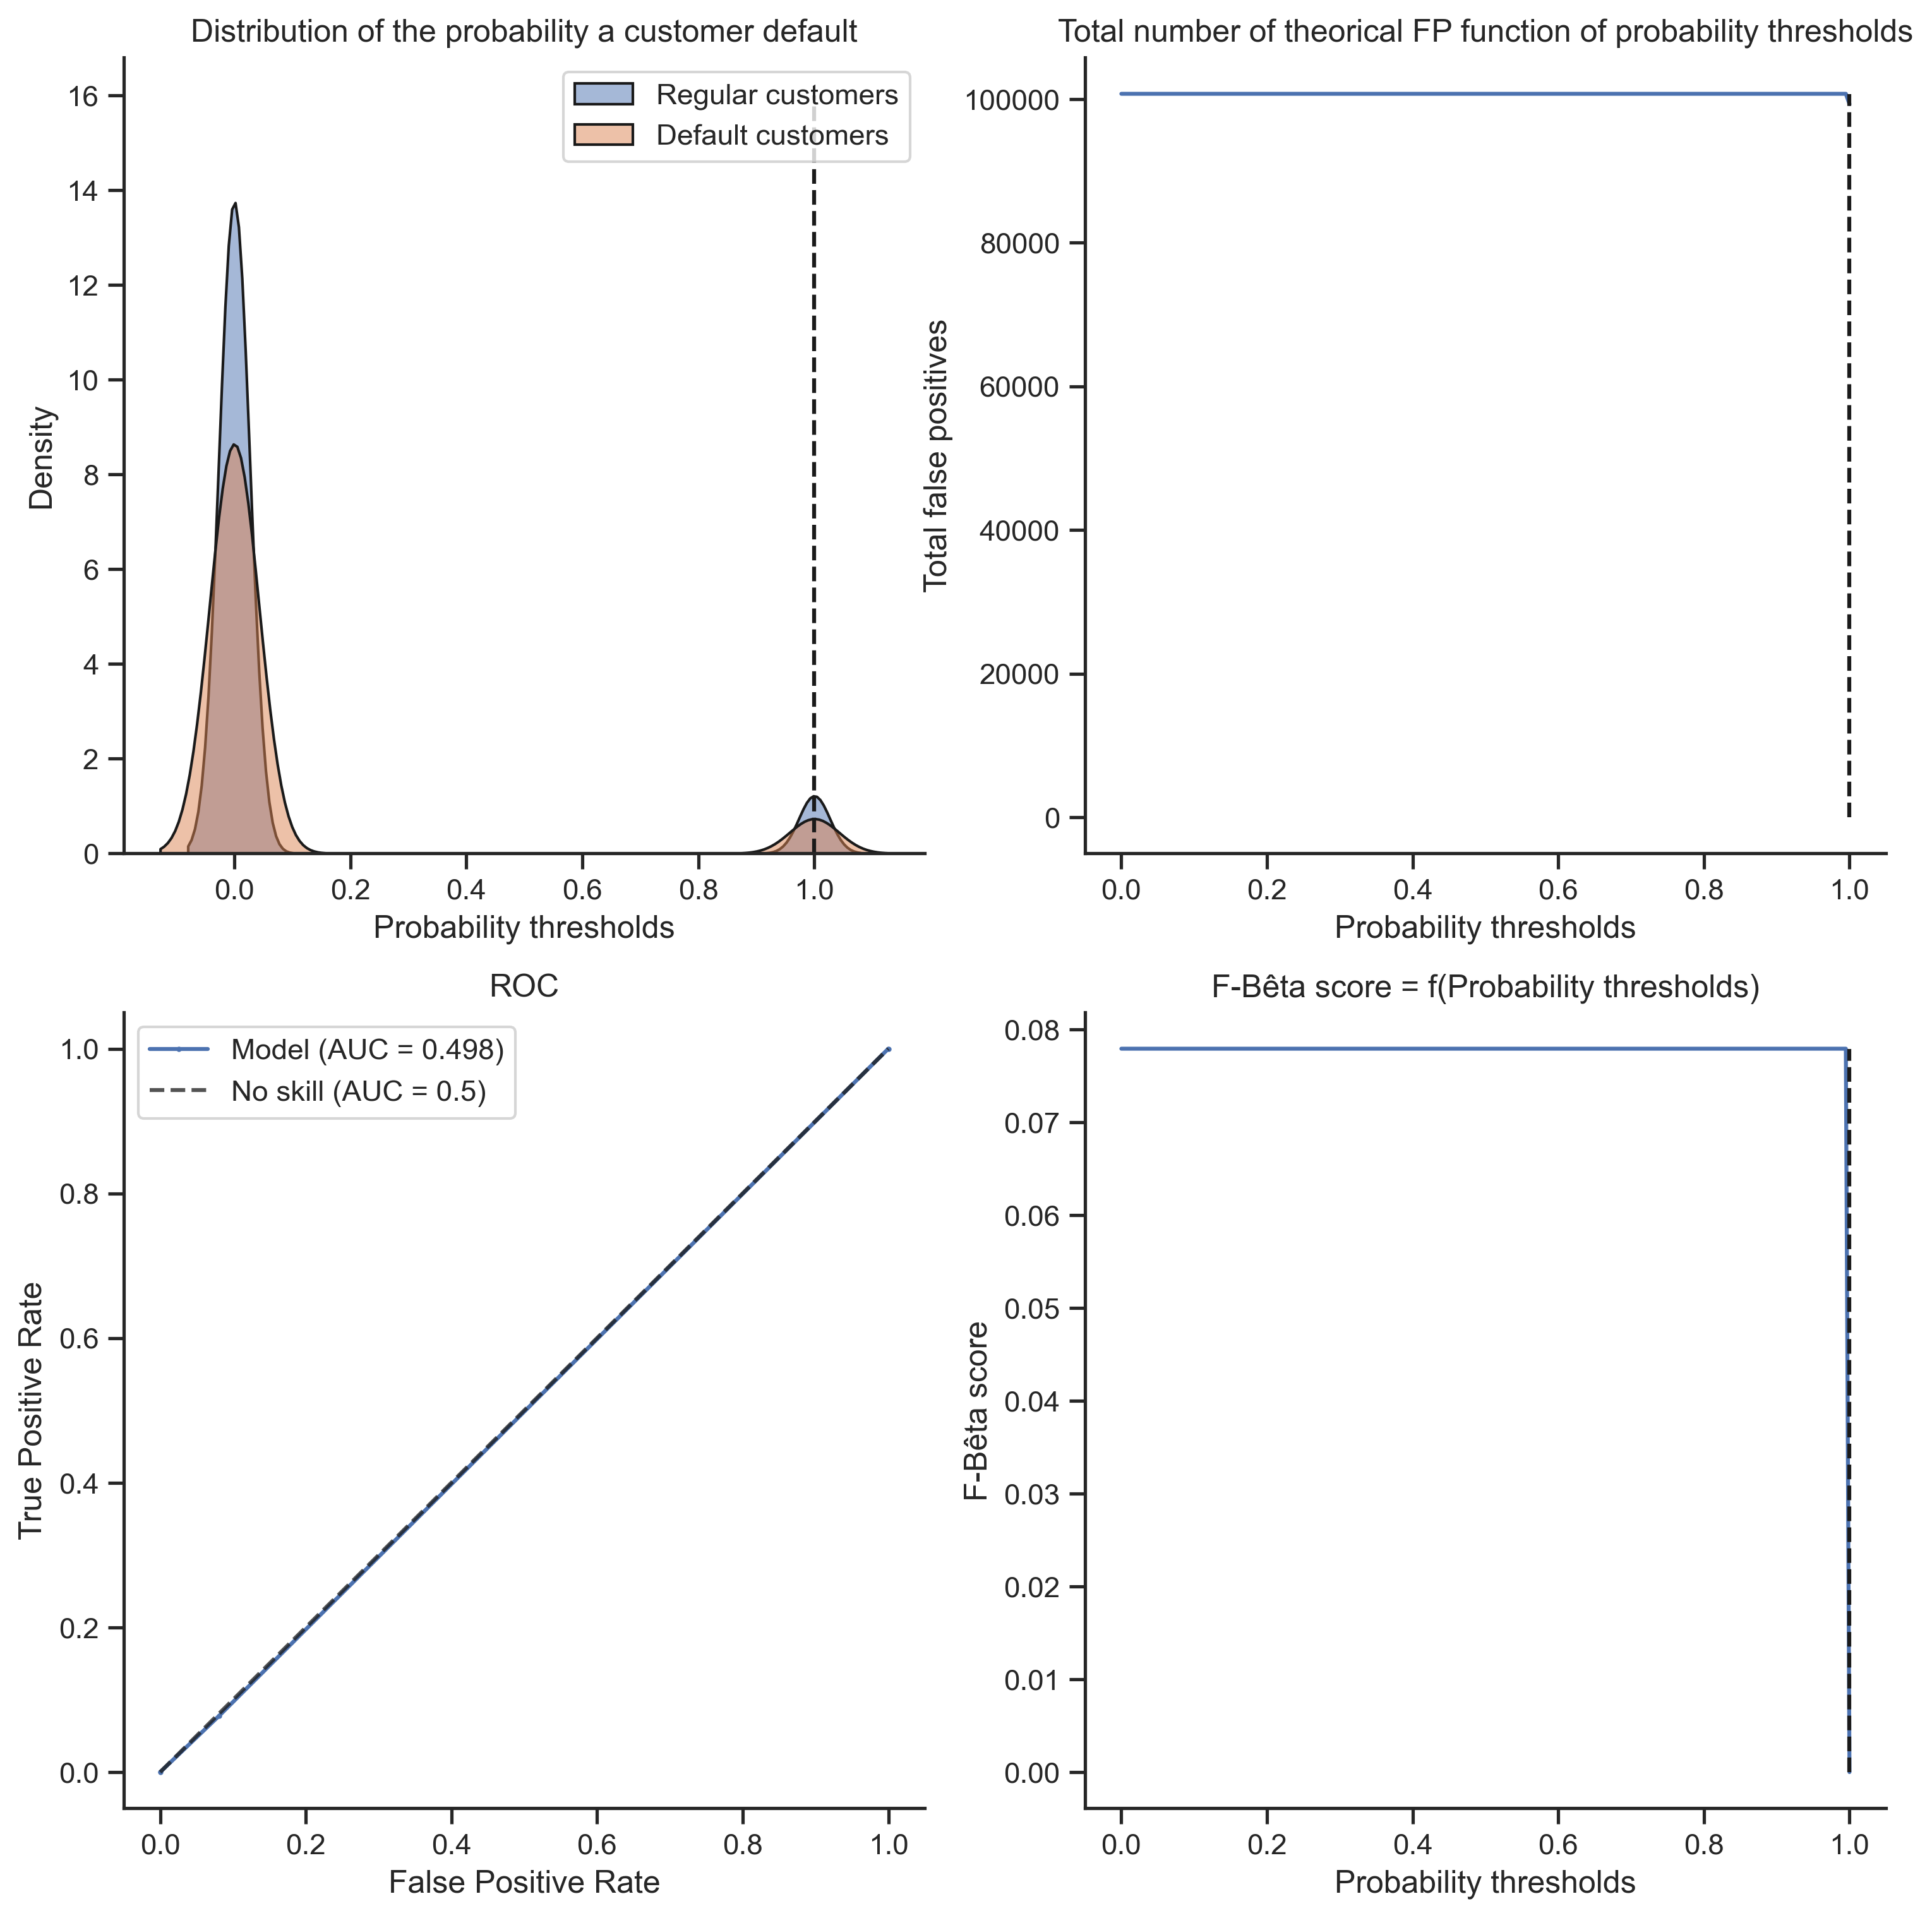

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                          
scl_wt_dummy_clf  (MinMaxScaler(), DummyClassifier(strategy='str...   

                                                         yhat_train  \
Model_labels                                                          
scl_wt_dummy_clf  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   

                                                          yhat_test  \
Model_labels                                                          
scl_wt_dummy_clf  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                  Best_proba_threshold_train  Best_proba_threshold_test  \
Model_labels                                                              
scl_wt_dummy_clf                         1.0                        1.0   

                  Job_score_train  Job_score_test  AUROC_scores_train  \
Model_labels                                                            
scl_wt_dummy_clf         0.532424        0.532424            0.499501   

                  AUROC_scores_test  F-bêta_score_train  F-bêta_score_test  \
Model_labels                                                                 
scl_wt_dummy_clf           0.498437            0.078976           0.077921   

                  Process_time_train (s)  Process_time_test (s)  \
Model_labels                                                      
scl_wt_dummy_clf                2.794142               2.761036   

                 Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                        
scl_wt_dummy_clf                             [0, 0, 9930, 113072]   

                 Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                      
scl_wt_dummy_clf                            [0, 0, 9930, 113072]

In [30]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### b) Logistic regressor

#### i. Importation

In [31]:
from sklearn.linear_model import LogisticRegression

#### ii. Creation of the model pipeline

In [32]:
# Initiliaze the model with its default values.
model = LogisticRegression()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'logi_reg_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()), ['model', LogisticRegression()]])

#### iii. Hyperparameters tuning

In [33]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LogisticRegression(),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['model', LogisticRegression()]],
 'verbose': False}


In [34]:
### Hyperparameters tuning range setting ###

# Set the value's ranges to try for the selected hypermarameters to tune.
C = [x for x in np.logspace(start=-5, stop=2, num=8)]
penalty = [None, 'l2']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = ({'model__C': C,
                     'model__penalty': penalty})


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'model__penalty': [None, 'l2']}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LogisticRegression(class_weight='balanced')]])


In [35]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LogisticRegression(C=0.1, class_weight='balanced')]])

Best score found:
 g_norm = 0.698

Best hyperparameters found:
 {'model__C': 0.1, 'model__penalty': 'l2'}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.764734
F-Bêta score of the optimal threshold found = 0.369
Highest F-Bêta score = 0.375
Job score: 0.699

----------------------------------------------------------------------------------------------------



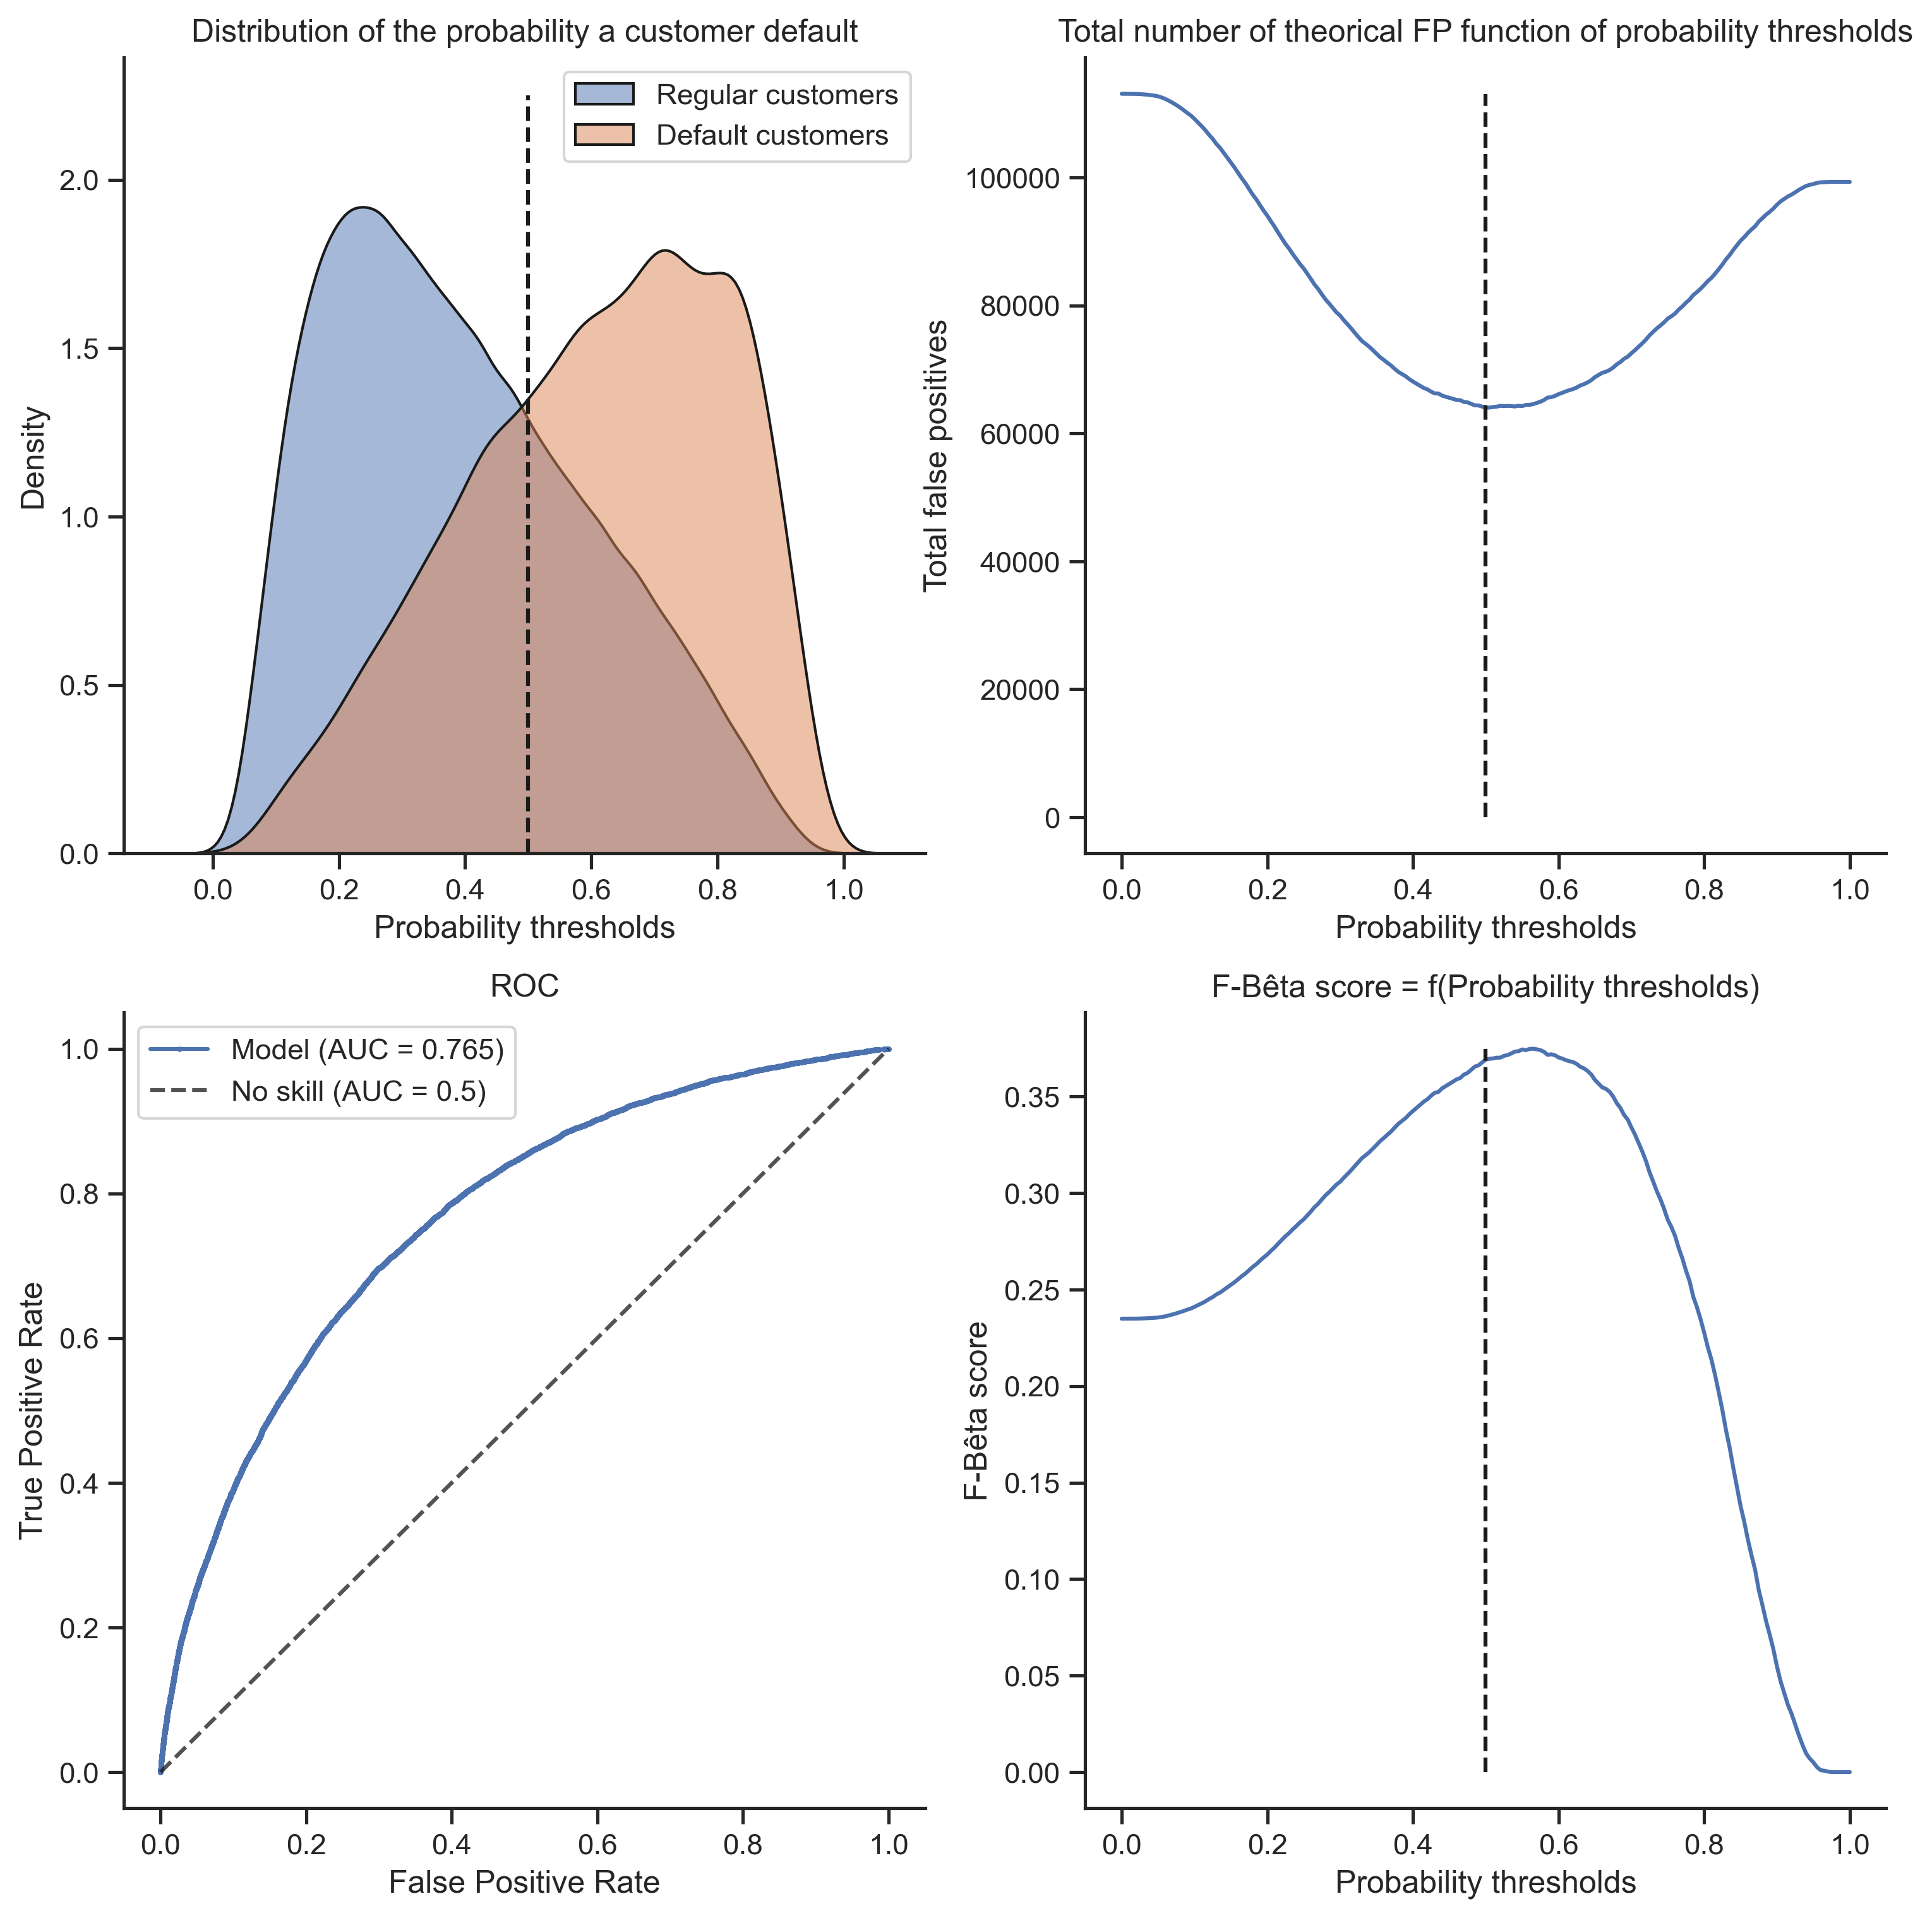

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt                                                NaN   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                                1.0   
scl_wt_logi_reg_clf_opt                         0.5   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                               1.0         0.532424   
scl_wt_logi_reg_clf_opt                        NaN         0.698680   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt             NaN            0.764734   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt                NaN            0.374797   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt                NaN               18.540412   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt                    NaN   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   

                        Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                             
scl_wt_dummy_clf                                   [0, 0, 9930, 113072]  
scl_wt_logi_reg_clf_opt                                             NaN

In [36]:
#### iv. Evaluation on the cross validated train data# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.764734
F-Bêta score of the optimal threshold found = 0.369
Highest F-Bêta score = 0.375
Job score: 0.699

----------------------------------------------------------------------------------------------------



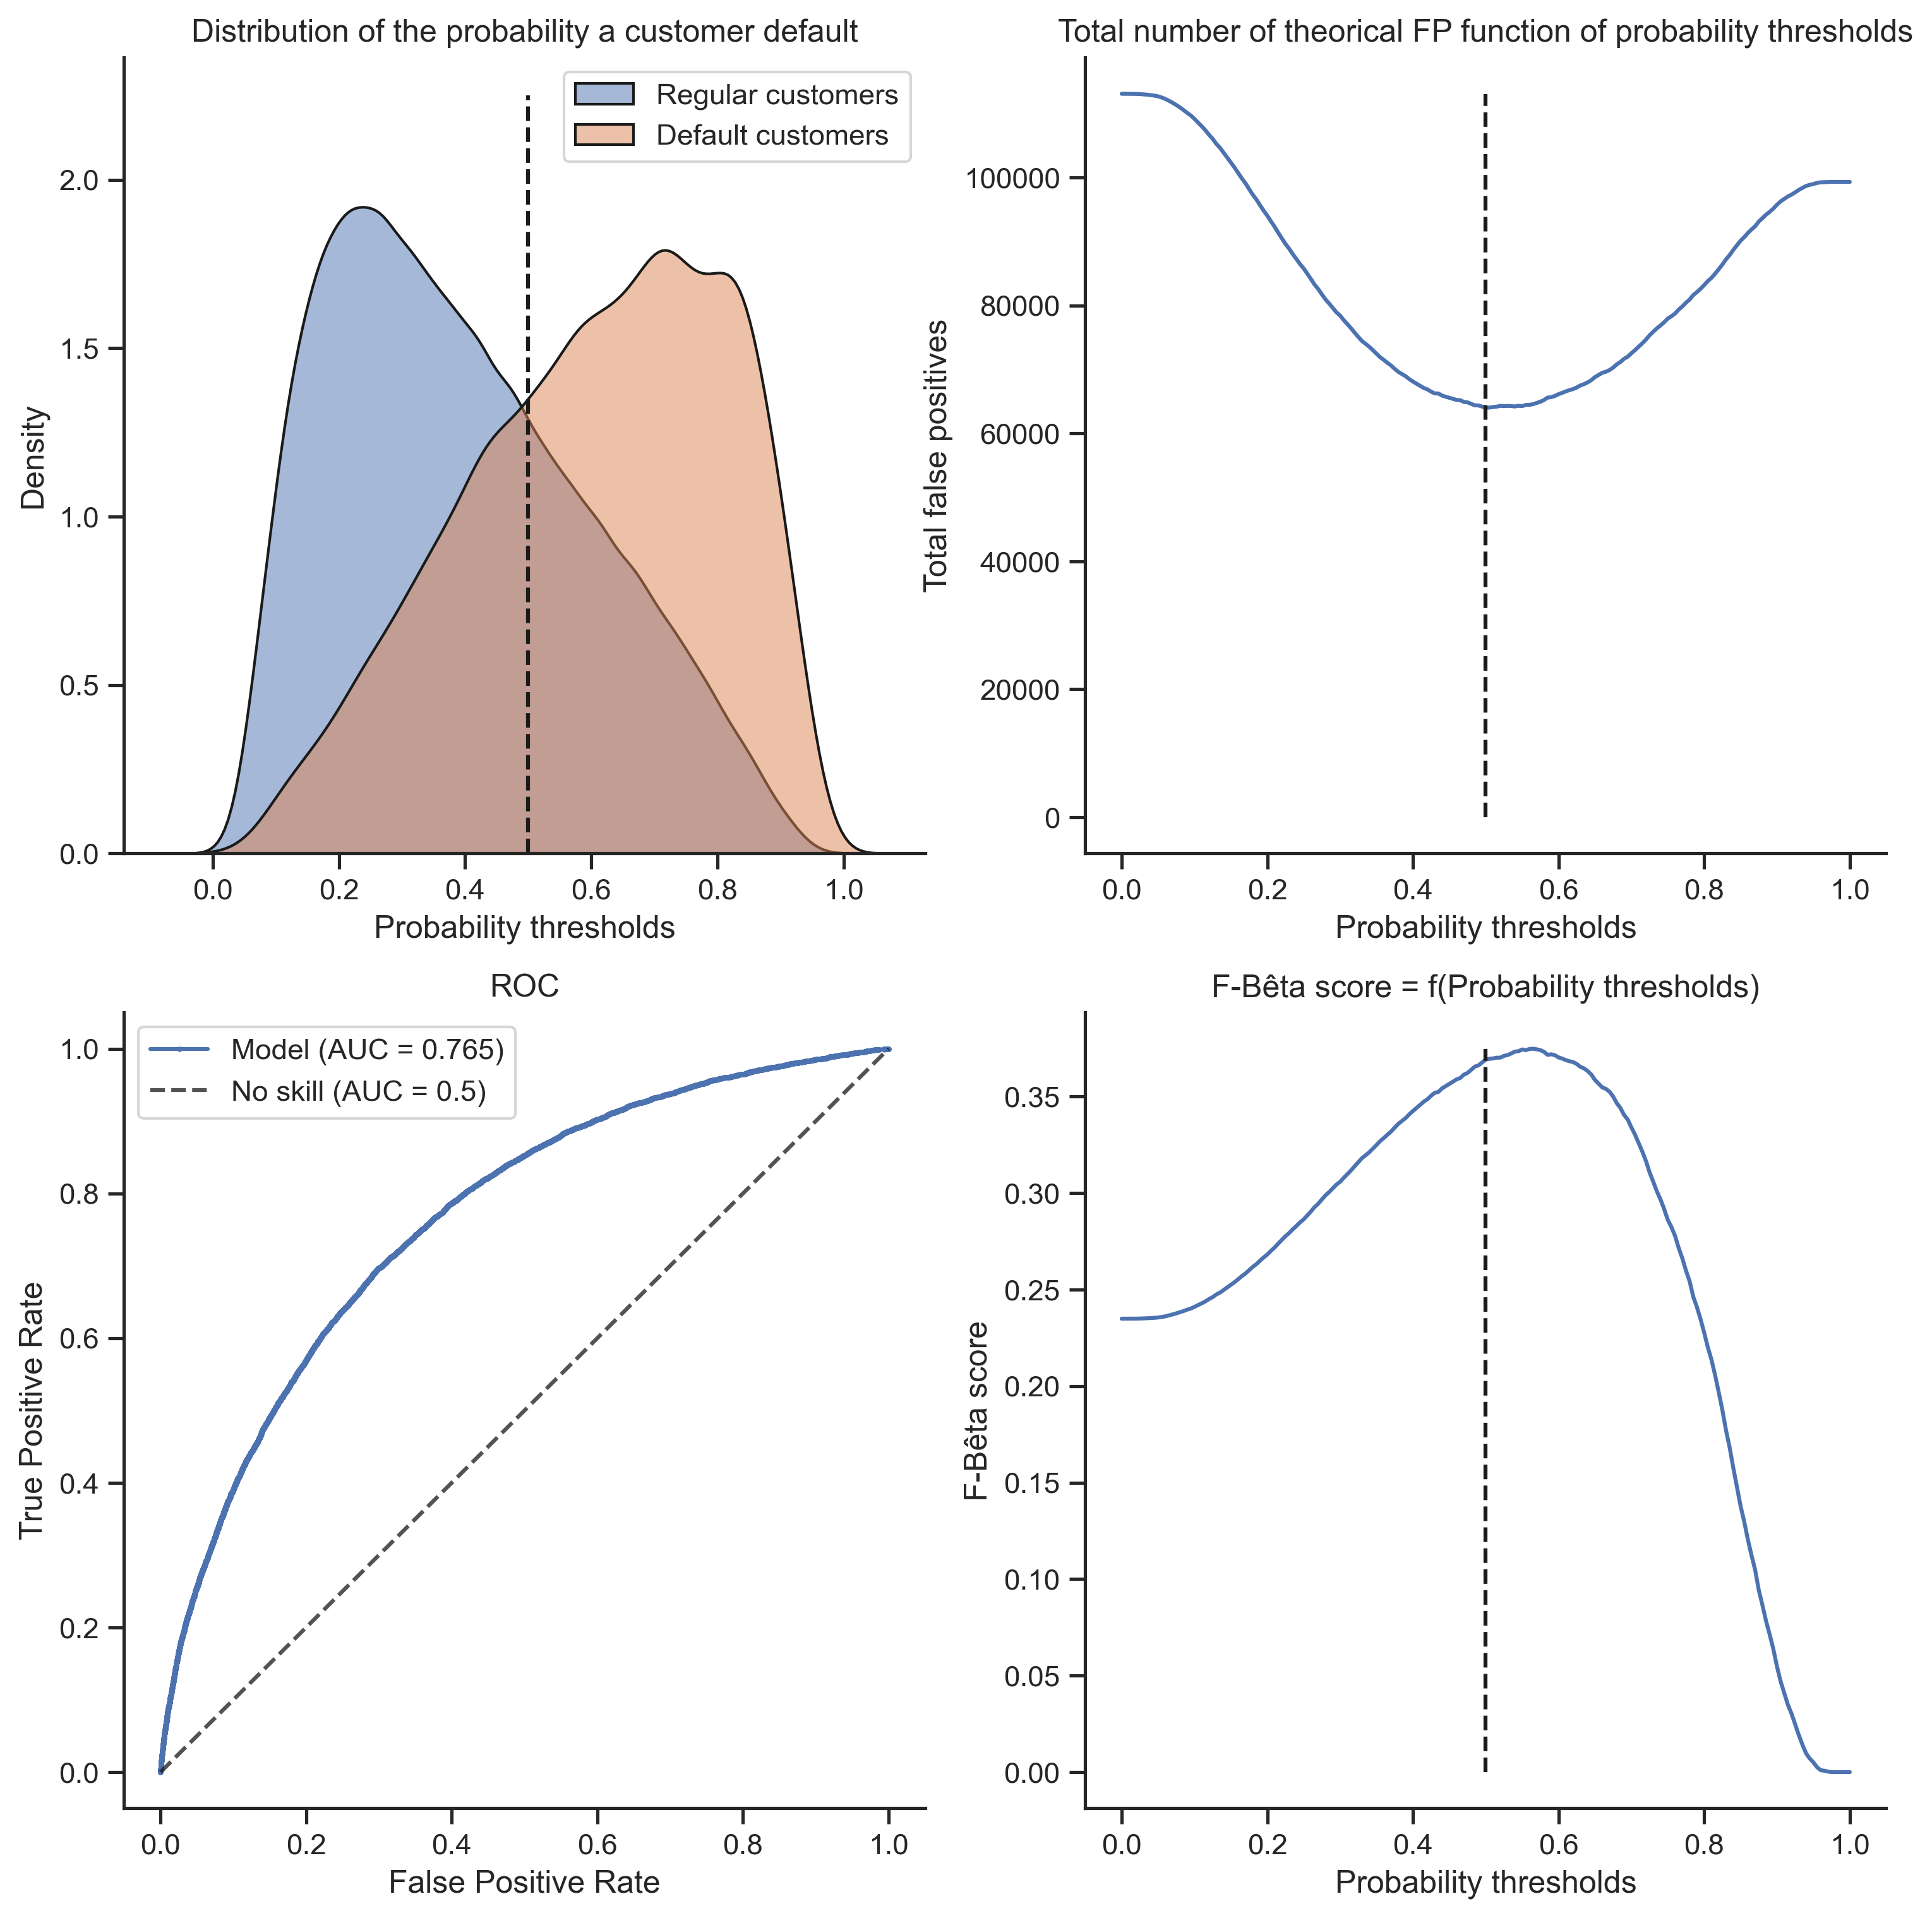

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                                1.0   
scl_wt_logi_reg_clf_opt                         0.5   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                               1.0         0.532424   
scl_wt_logi_reg_clf_opt                        0.5         0.698680   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt        0.698680            0.764734   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt           0.764734            0.374797   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt           0.374797               18.540412   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt              18.526587   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   

                        Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                             
scl_wt_dummy_clf                                   [0, 0, 9930, 113072]  
scl_wt_logi_reg_clf_opt                      [6881, 33502, 3049, 79570]

In [37]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### c) Random forest

#### i. Importation

In [38]:
from sklearn.ensemble import RandomForestClassifier

#### ii. Creation of the model pipeline

In [39]:
# Initiliaze the model with its default values.
model = RandomForestClassifier()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'rf_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', RandomForestClassifier()]])

#### iii. Hyperparameters tuning

In [40]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': RandomForestClassifier(),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['model', RandomForestClassifier()]],
 'verbose': False}


In [41]:
### Hyperparameters tuning range setting ###

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 50, num = 51)][1:]

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]

# Minimum number of samples required to split a node.
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 11)]
min_samples_split[0] = 2

# Use or don't bootstrap samples.
#bootstrap = [True, False]

# Number of features to consider at every split.
max_features = [None, 'auto', 'sqrt', 'log2']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_samples_split': min_samples_split,
                    #'model__bootstrap': bootstrap,
                    'model__max_features': max_features,
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__max_features': [None, 'auto', 'sqrt', 'log2'],
 'model__min_samples_split': [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                         31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                         45, 46, 47, 48, 49, 50]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', RandomForestClassifier(class_weight='balanced')]])


In [42]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=None,
                                        min_samples_split=100,
                                        n_estimators=33)]])

Best score found:
 g_norm = 0.681

Best hyperparameters found:
 {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 100, 'model__n_estimators': 33}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.751657
F-Bêta score of the optimal threshold found = 0.354
Highest F-Bêta score = 0.365
Job score: 0.687

----------------------------------------------------------------------------------------------------



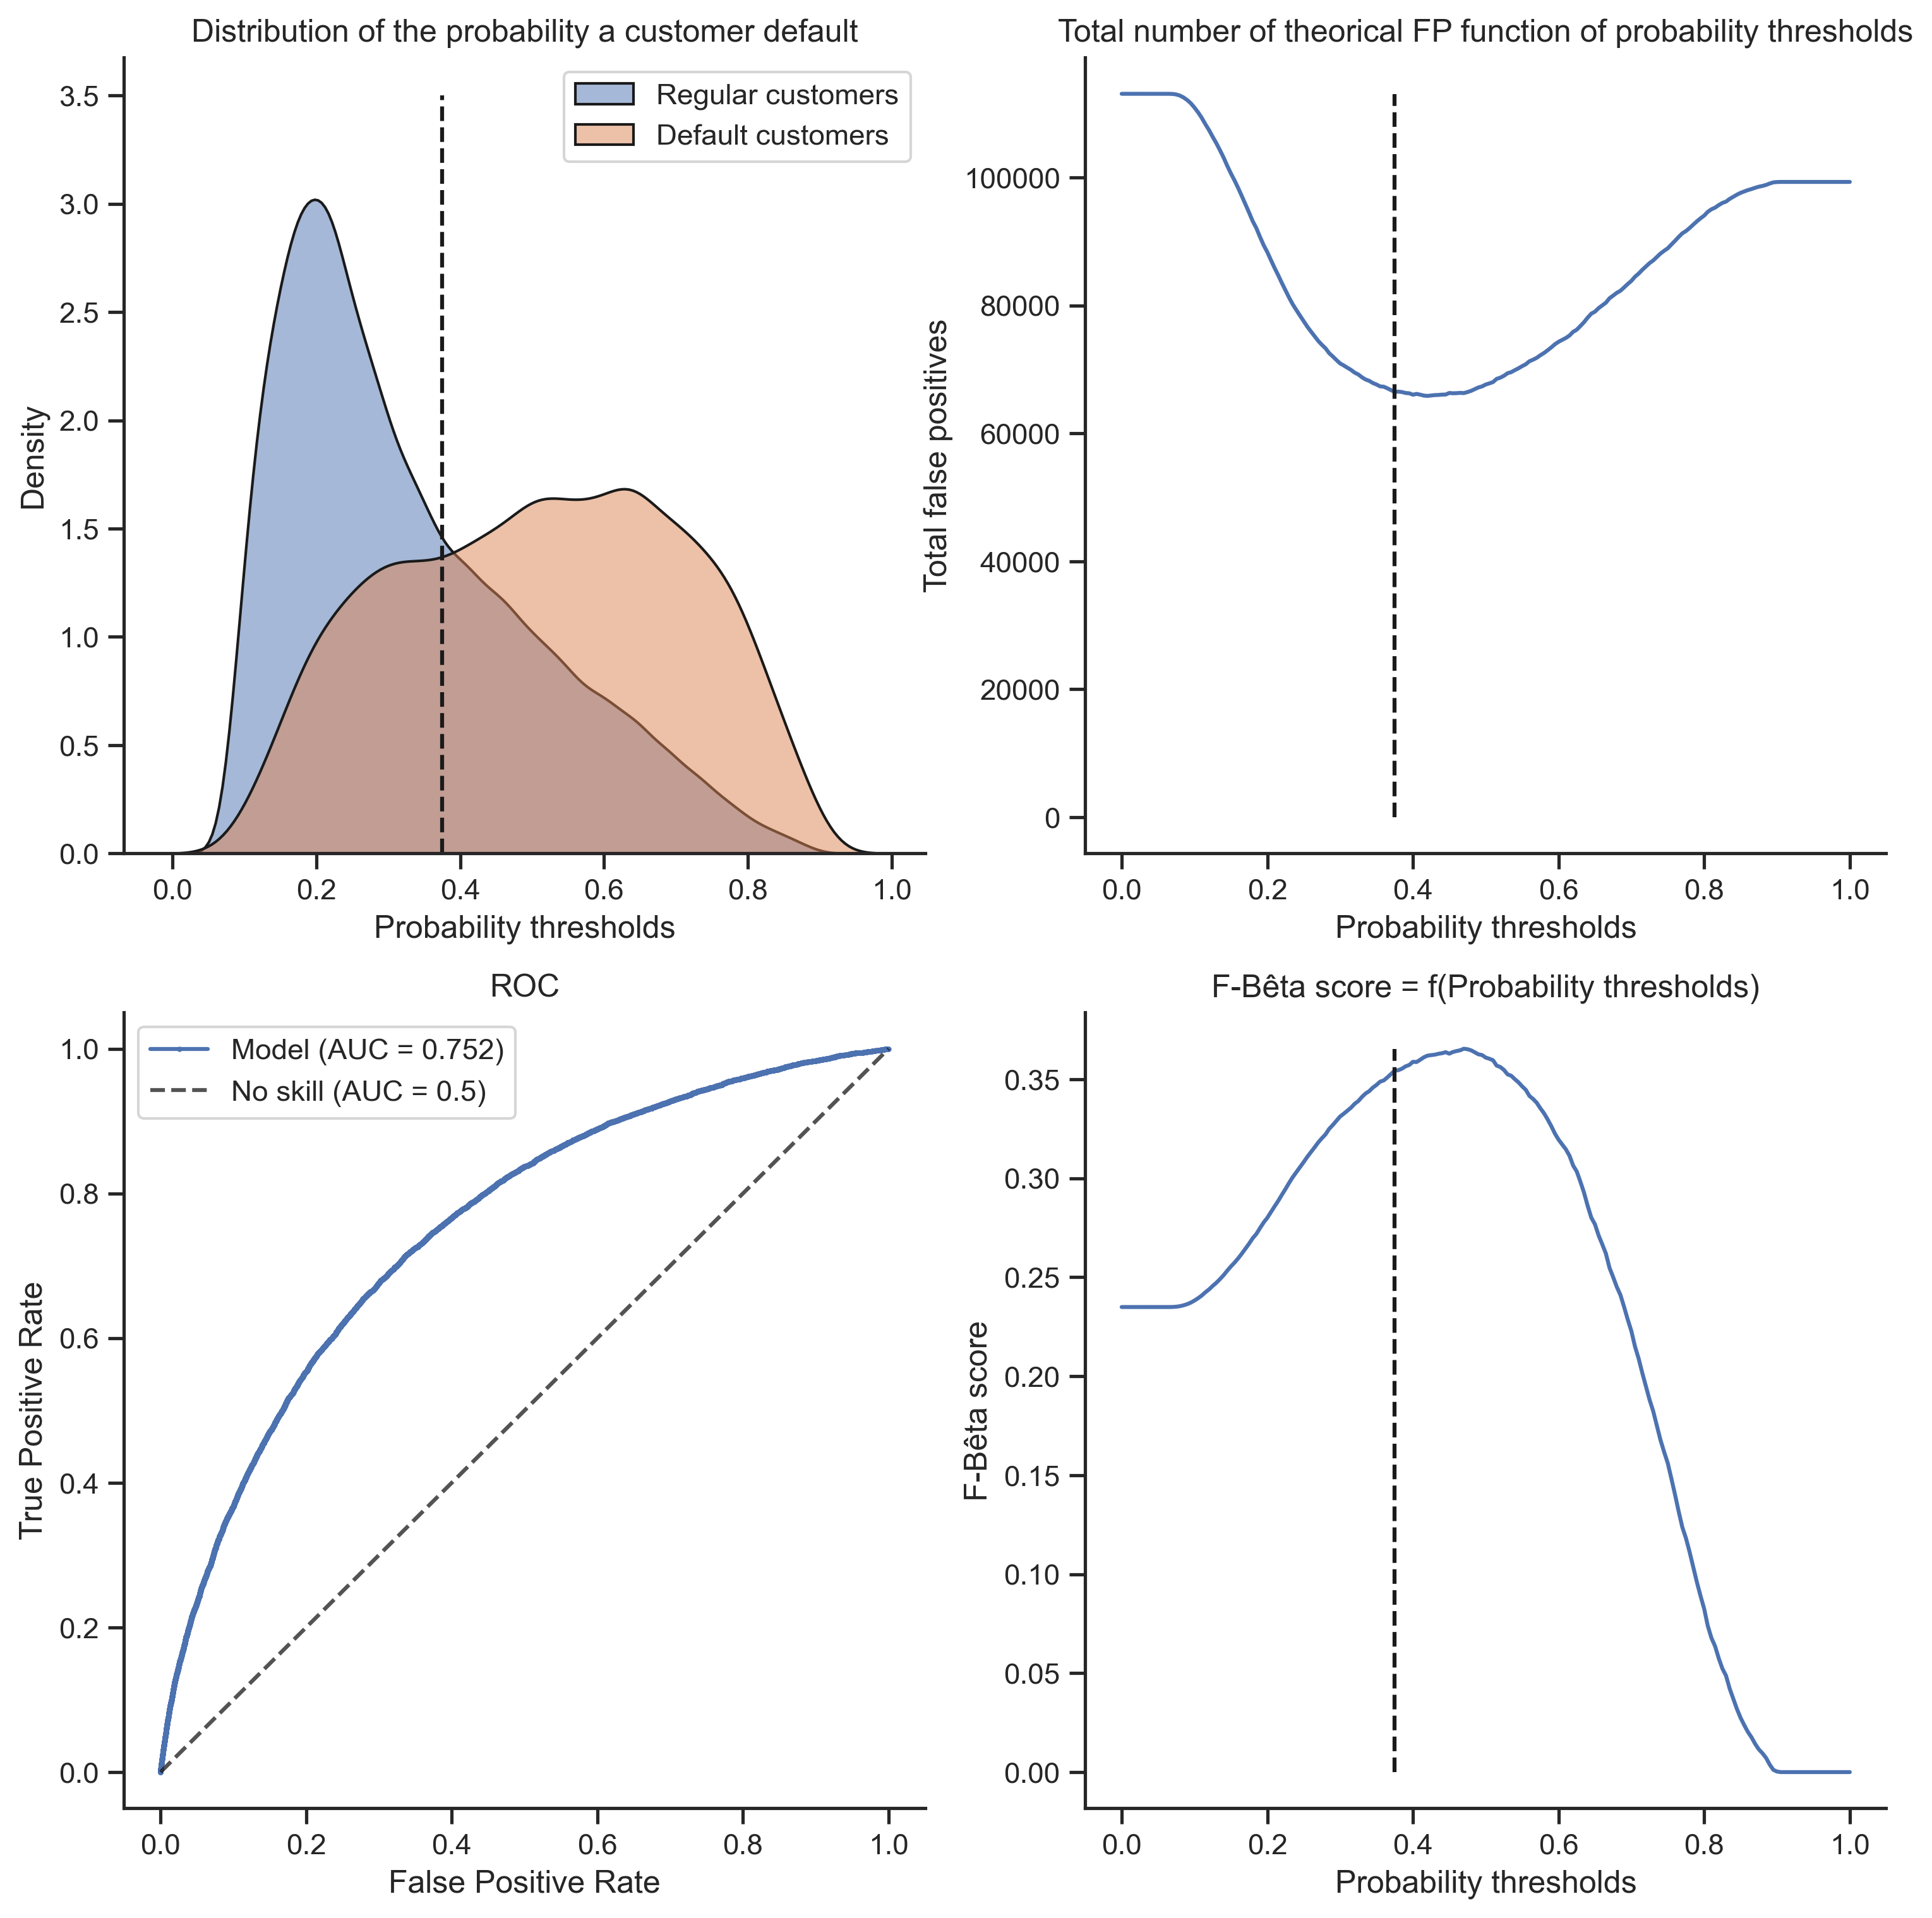

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
scl_wt_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.48581755097810747, 0.23034944946814004, 0.2...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt                                                      NaN   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                              1.000   
scl_wt_logi_reg_clf_opt                       0.500   
scl_wt_rf_clf_opt                             0.375   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                               1.0         0.532424   
scl_wt_logi_reg_clf_opt                        0.5         0.698680   
scl_wt_rf_clf_opt                              NaN         0.687007   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt        0.698680            0.764734   
scl_wt_rf_clf_opt                   NaN            0.751657   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt           0.764734            0.374797   
scl_wt_rf_clf_opt                      NaN            0.365414   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt           0.374797               18.540412   
scl_wt_rf_clf_opt                      NaN             1728.167900   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt              18.526587   
scl_wt_rf_clf_opt                          NaN   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   
scl_wt_rf_clf_opt                             [7099, 38161, 2831, 74911]   

                        Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                             
scl_wt_dummy_clf                                   [0, 0, 9930, 113072]  
scl_wt_logi_reg_clf_opt                      [6881, 33502, 3049, 79570]  
scl_wt_rf_clf_opt                                                   NaN

CPU times: total: 29min 18s
Wall time: 29min 15s


In [43]:
%%time

# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.750971
F-Bêta score of the optimal threshold found = 0.355
Highest F-Bêta score = 0.367
Job score: 0.688

----------------------------------------------------------------------------------------------------



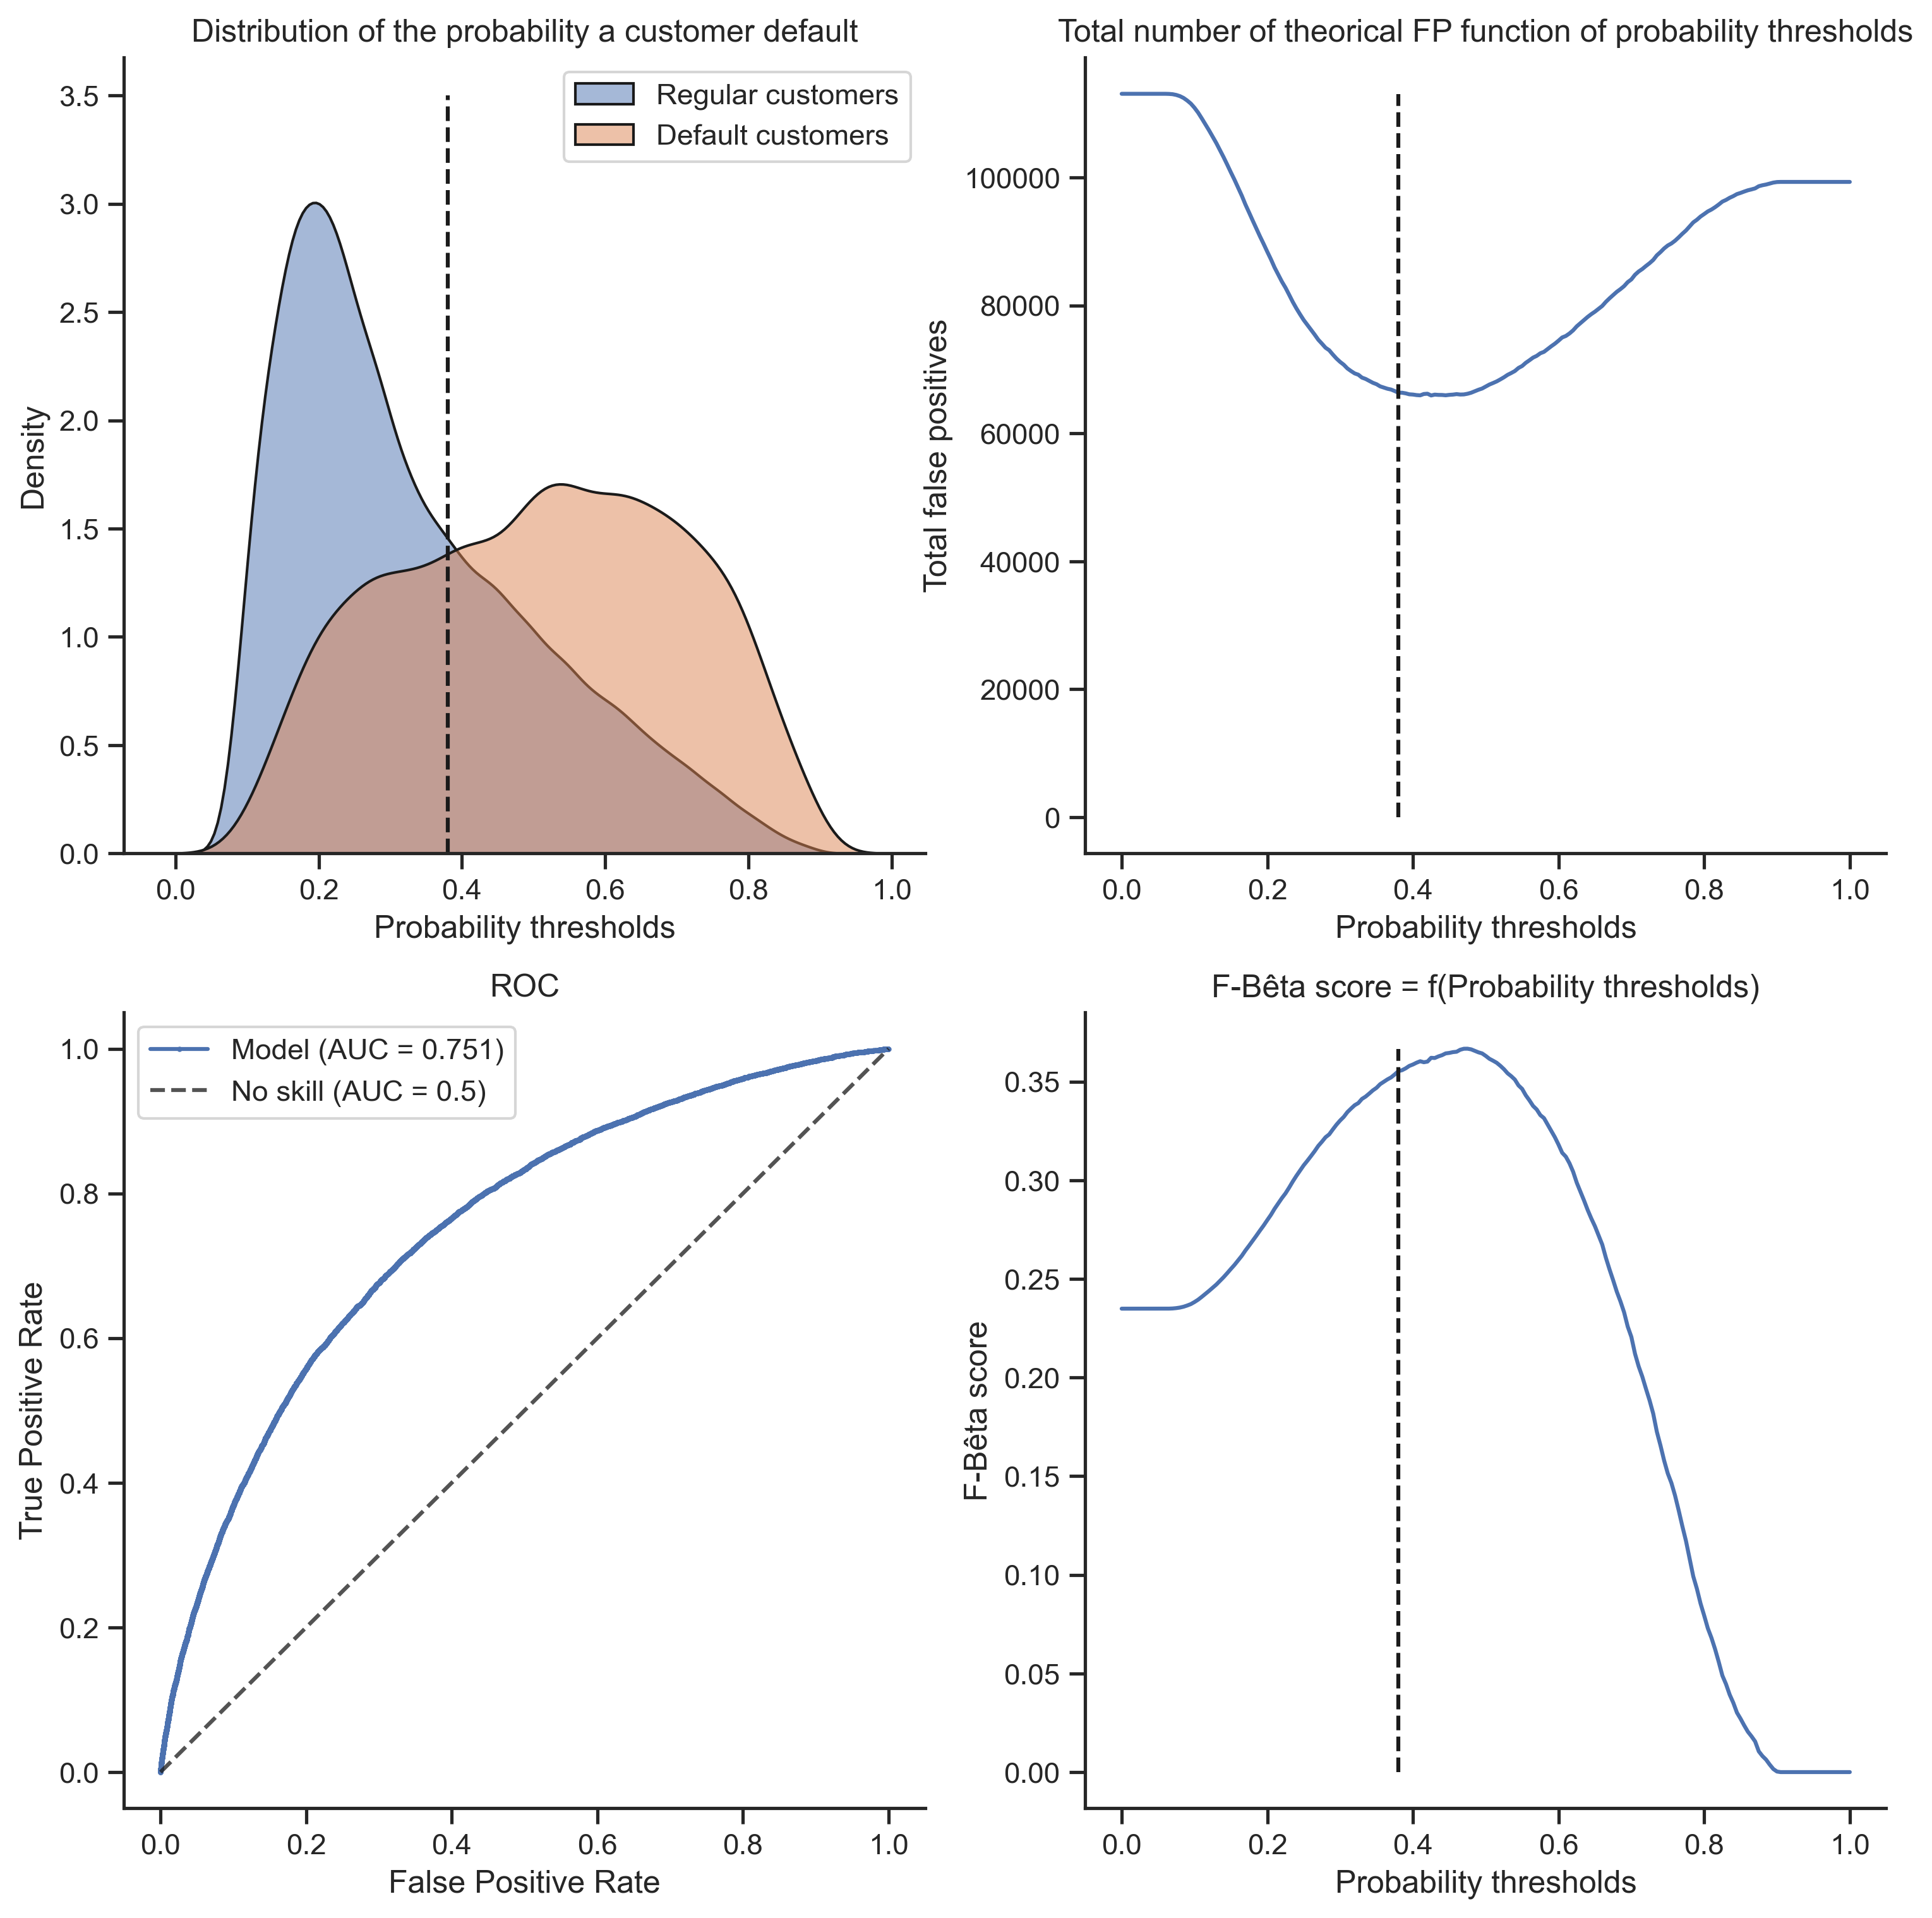

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
scl_wt_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.48581755097810747, 0.23034944946814004, 0.2...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.510608288075357, 0.16365170111395783, 0.243...   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                              1.000   
scl_wt_logi_reg_clf_opt                       0.500   
scl_wt_rf_clf_opt                             0.375   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                              1.00         0.532424   
scl_wt_logi_reg_clf_opt                       0.50         0.698680   
scl_wt_rf_clf_opt                             0.38         0.687007   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt        0.698680            0.764734   
scl_wt_rf_clf_opt              0.687581            0.751657   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt           0.764734            0.374797   
scl_wt_rf_clf_opt                 0.750971            0.365414   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt           0.374797               18.540412   
scl_wt_rf_clf_opt                 0.366705             1728.167900   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt              18.526587   
scl_wt_rf_clf_opt                  1720.082333   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   
scl_wt_rf_clf_opt                             [7099, 38161, 2831, 74911]   

                        Confusion_matrix_values_test ([TP, FP, FN, TN])  
Model_labels                                                             
scl_wt_dummy_clf                                   [0, 0, 9930, 113072]  
scl_wt_logi_reg_clf_opt                      [6881, 33502, 3049, 79570]  
scl_wt_rf_clf_opt                            [7037, 37419, 2893, 75653]

CPU times: total: 29min 10s
Wall time: 29min 7s


In [44]:
%%time

# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### d) XGBoosting

#### i. Importation

In [45]:
import xgboost as xgb
from xgboost import XGBClassifier

print('XGBoost version:', xgb.__version__)

XGBoost version: 1.7.5


#### ii. Creation of the model pipeline

In [46]:
# Initiliaze the model with its default values.
model = XGBClassifier(objective='binary:logistic', seed=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'xgb_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...)]])

#### iii. Hyperparameters tuning

In [47]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'model__base_score': None,
 'model__booster': None,
 'model__callbacks': None,
 'model__colsample_bylevel': None,
 'model__colsample_bynode': None,
 'model__colsample_bytree': None,
 'model__early_stopping_rounds': None

In [48]:
### Get the optimal number of trees thanks to early stopping ###

# Set the number of runs to perform.
n_es_loop = 5

# Set the xgboost evaluation metric for the early stopping.
# NB: if more than one evaluation metric are given the last one is used for early stopping
model.set_params(eval_metric='auc')

# Run the set amount of loops to get the most promising range of number of trees to get.
verbose = 0
l_n_iters = []
l_scores = []
l_n_trees = []
count = 0
for count in range(n_es_loop):
    model.fit(X_TRAIN, y_TRAIN, early_stopping_rounds=50, eval_set=[(X_TEST, y_TEST)], verbose=verbose)
    l_scores.append(model.best_score)
    l_n_iters.append(model.best_iteration)
    l_n_trees.append(model.best_ntree_limit)
    if verbose != 0:
        print()

# Show the results.    
print("Averages gotten on {0} loops. \
      \n Average score: {1}\n Average number of iterations: {2}\n Average number of trees: {3}".\
      format(n_es_loop, np.mean(l_scores), np.mean(l_n_iters), np.mean(l_n_trees)))

Averages gotten on 5 loops.       
 Average score: 0.7671099290448531
 Average number of iterations: 35.0
 Average number of trees: 36.0


Finally, it appears that the optimal number of estimators depends too much on the other hyperparameters.<br>
=> The value is not set as default and will also by used in the searchCV.

In [49]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
eta = [round(x, 2) for x in np.linspace(start=0.02, stop=0.3, num=15)]
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
lambda_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
alpha_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__eta': eta,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(scale_pos_weight=9) # NB: scale_pos_weight = TN / TP


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__eta': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22,
                0.24, 0.26, 0.28, 0.3],
 'model__gamma': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18,
                  0.2],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early

In [51]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


XGBoostError: bad allocation

#### iv. Evaluation on the cross validated train data

In [ ]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set

In [ ]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### e) LightGBM

#### i. Importation

In [52]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

print('lightgbm version:', lgbm.__version__)

lightgbm version: 3.3.5


#### ii. Creation of the model pipeline

In [53]:
# Initiliaze the model with its default values.
model = LGBMClassifier(objective='binary', random_state=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'lgbm_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model', LGBMClassifier(objective='binary', random_state=0)]])

#### iii. Hyperparameters tuning

In [54]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LGBMClassifier(objective='binary', random_state=0),
 'model__boosting_type': 'gbdt',
 'model__class_weight': None,
 'model__colsample_bytree': 1.0,
 'model__importance_type': 'split',
 'model__learning_rate': 0.1,
 'model__max_depth': -1,
 'model__min_child_samples': 20,
 'model__min_child_weight': 0.001,
 'model__min_split_gain': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': -1,
 'model__num_leaves': 31,
 'model__objective': 'binary',
 'model__random_state': 0,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 0.0,
 'model__silent': 'warn',
 'model__subsample': 1.0,
 'model__subsample_for_bin': 200000,
 'model__subsample_freq': 0,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()),
           ['model', LGBMClassifier(objective='binary', random_state=0)]],
 'verbose': False}


In [55]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
learning_rate = [round(x, 2) for x in np.linspace(start=0.0, stop=0.3, num=16)]
learning_rate[0] = 0.001
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
#gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
reg_lambda = [x for x in np.logspace(-4, 0, 5)] # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
reg_alpha = [x for x in np.logspace(-4, 0, 5)] # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__learning_rate': learning_rate,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    #'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree,
                    'model__reg_lambda': reg_lambda,
                    'model__reg_alpha': reg_alpha
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__learning_rate': [0.001, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16,
                          0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', objective='binary',
                                random_state=0)]])


In [56]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0,
                                      verbose=2, model_label=model_label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.24,
                                max_depth=90, min_child_weight=1,
                                n_estimators=36, objective='binary',
                                random_state=0, reg_alpha=0.01,
                                reg_lambda=0.0001, subsample=0.8)]])

Best score found:
 g_norm = 0.706

Best hyperparameters found:
 {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.24, 'model__max_depth': 90, 'model__min_child_weight': 1, 'model__n_estimators': 36, 'model__reg_alpha': 0.01, 'model__reg_lambda': 0.0001, 'model__subsample': 0.8}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.770568
F-Bêta score of the optimal threshold found = 0.374
Highest F-Bêta score = 0.386
Job score: 0.704

----------------------------------------------------------------------------------------------------



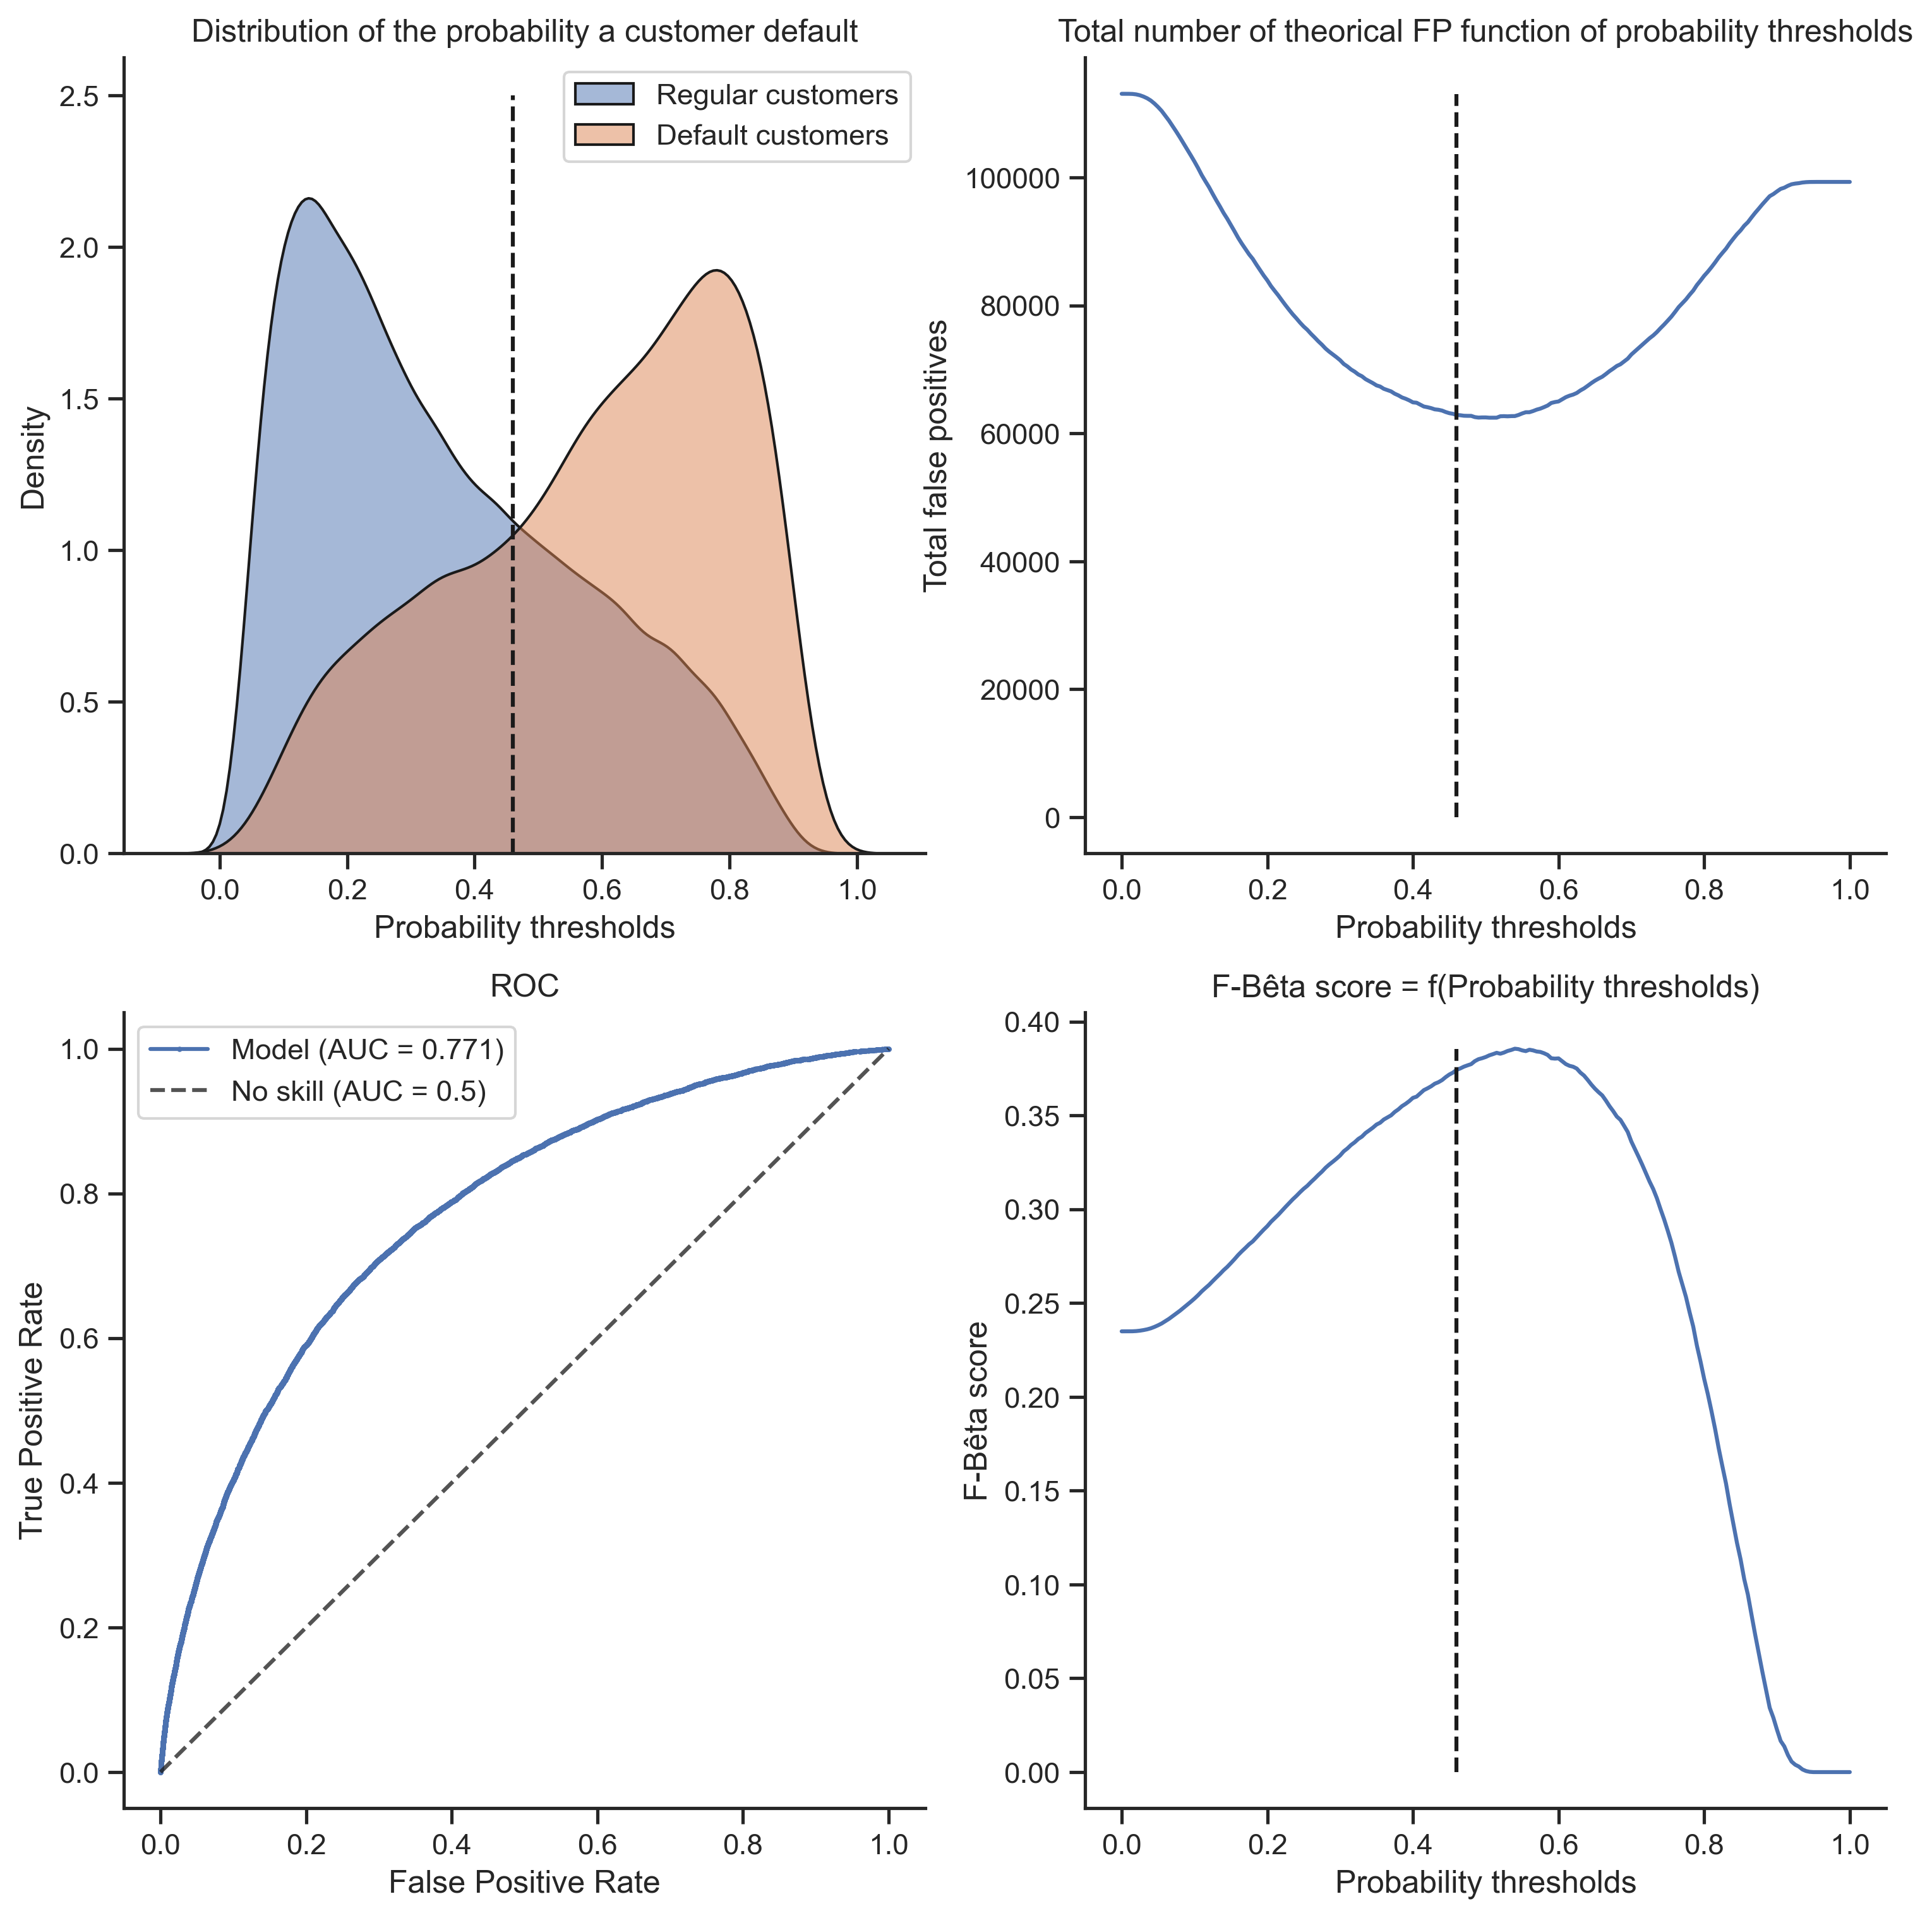

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
scl_wt_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_lgbm_clf_opt      (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.48581755097810747, 0.23034944946814004, 0.2...   
scl_wt_lgbm_clf_opt      [0.591950048973562, 0.23240067341337958, 0.338...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.510608288075357, 0.16365170111395783, 0.243...   
scl_wt_lgbm_clf_opt                                                    NaN   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                              1.000   
scl_wt_logi_reg_clf_opt                       0.500   
scl_wt_rf_clf_opt                             0.375   
scl_wt_lgbm_clf_opt                           0.460   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                              1.00         0.532424   
scl_wt_logi_reg_clf_opt                       0.50         0.698680   
scl_wt_rf_clf_opt                             0.38         0.687007   
scl_wt_lgbm_clf_opt                            NaN         0.703991   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt        0.698680            0.764734   
scl_wt_rf_clf_opt              0.687581            0.751657   
scl_wt_lgbm_clf_opt                 NaN            0.770568   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt           0.764734            0.374797   
scl_wt_rf_clf_opt                 0.750971            0.365414   
scl_wt_lgbm_clf_opt                    NaN            0.385565   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt           0.374797               18.540412   
scl_wt_rf_clf_opt                 0.366705             1728.167900   
scl_wt_lgbm_clf_opt                    NaN               11.207665   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt              18.526587   
scl_wt_rf_clf_opt                  1720.082333   
scl_wt_lgbm_clf_opt                        NaN   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   
scl_wt_rf_clf_opt                             [7099, 38161, 2831, 74911]   
scl_wt_lgbm_clf_opt      

In [57]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.770568
F-Bêta score of the optimal threshold found = 0.374
Highest F-Bêta score = 0.386
Job score: 0.704

----------------------------------------------------------------------------------------------------



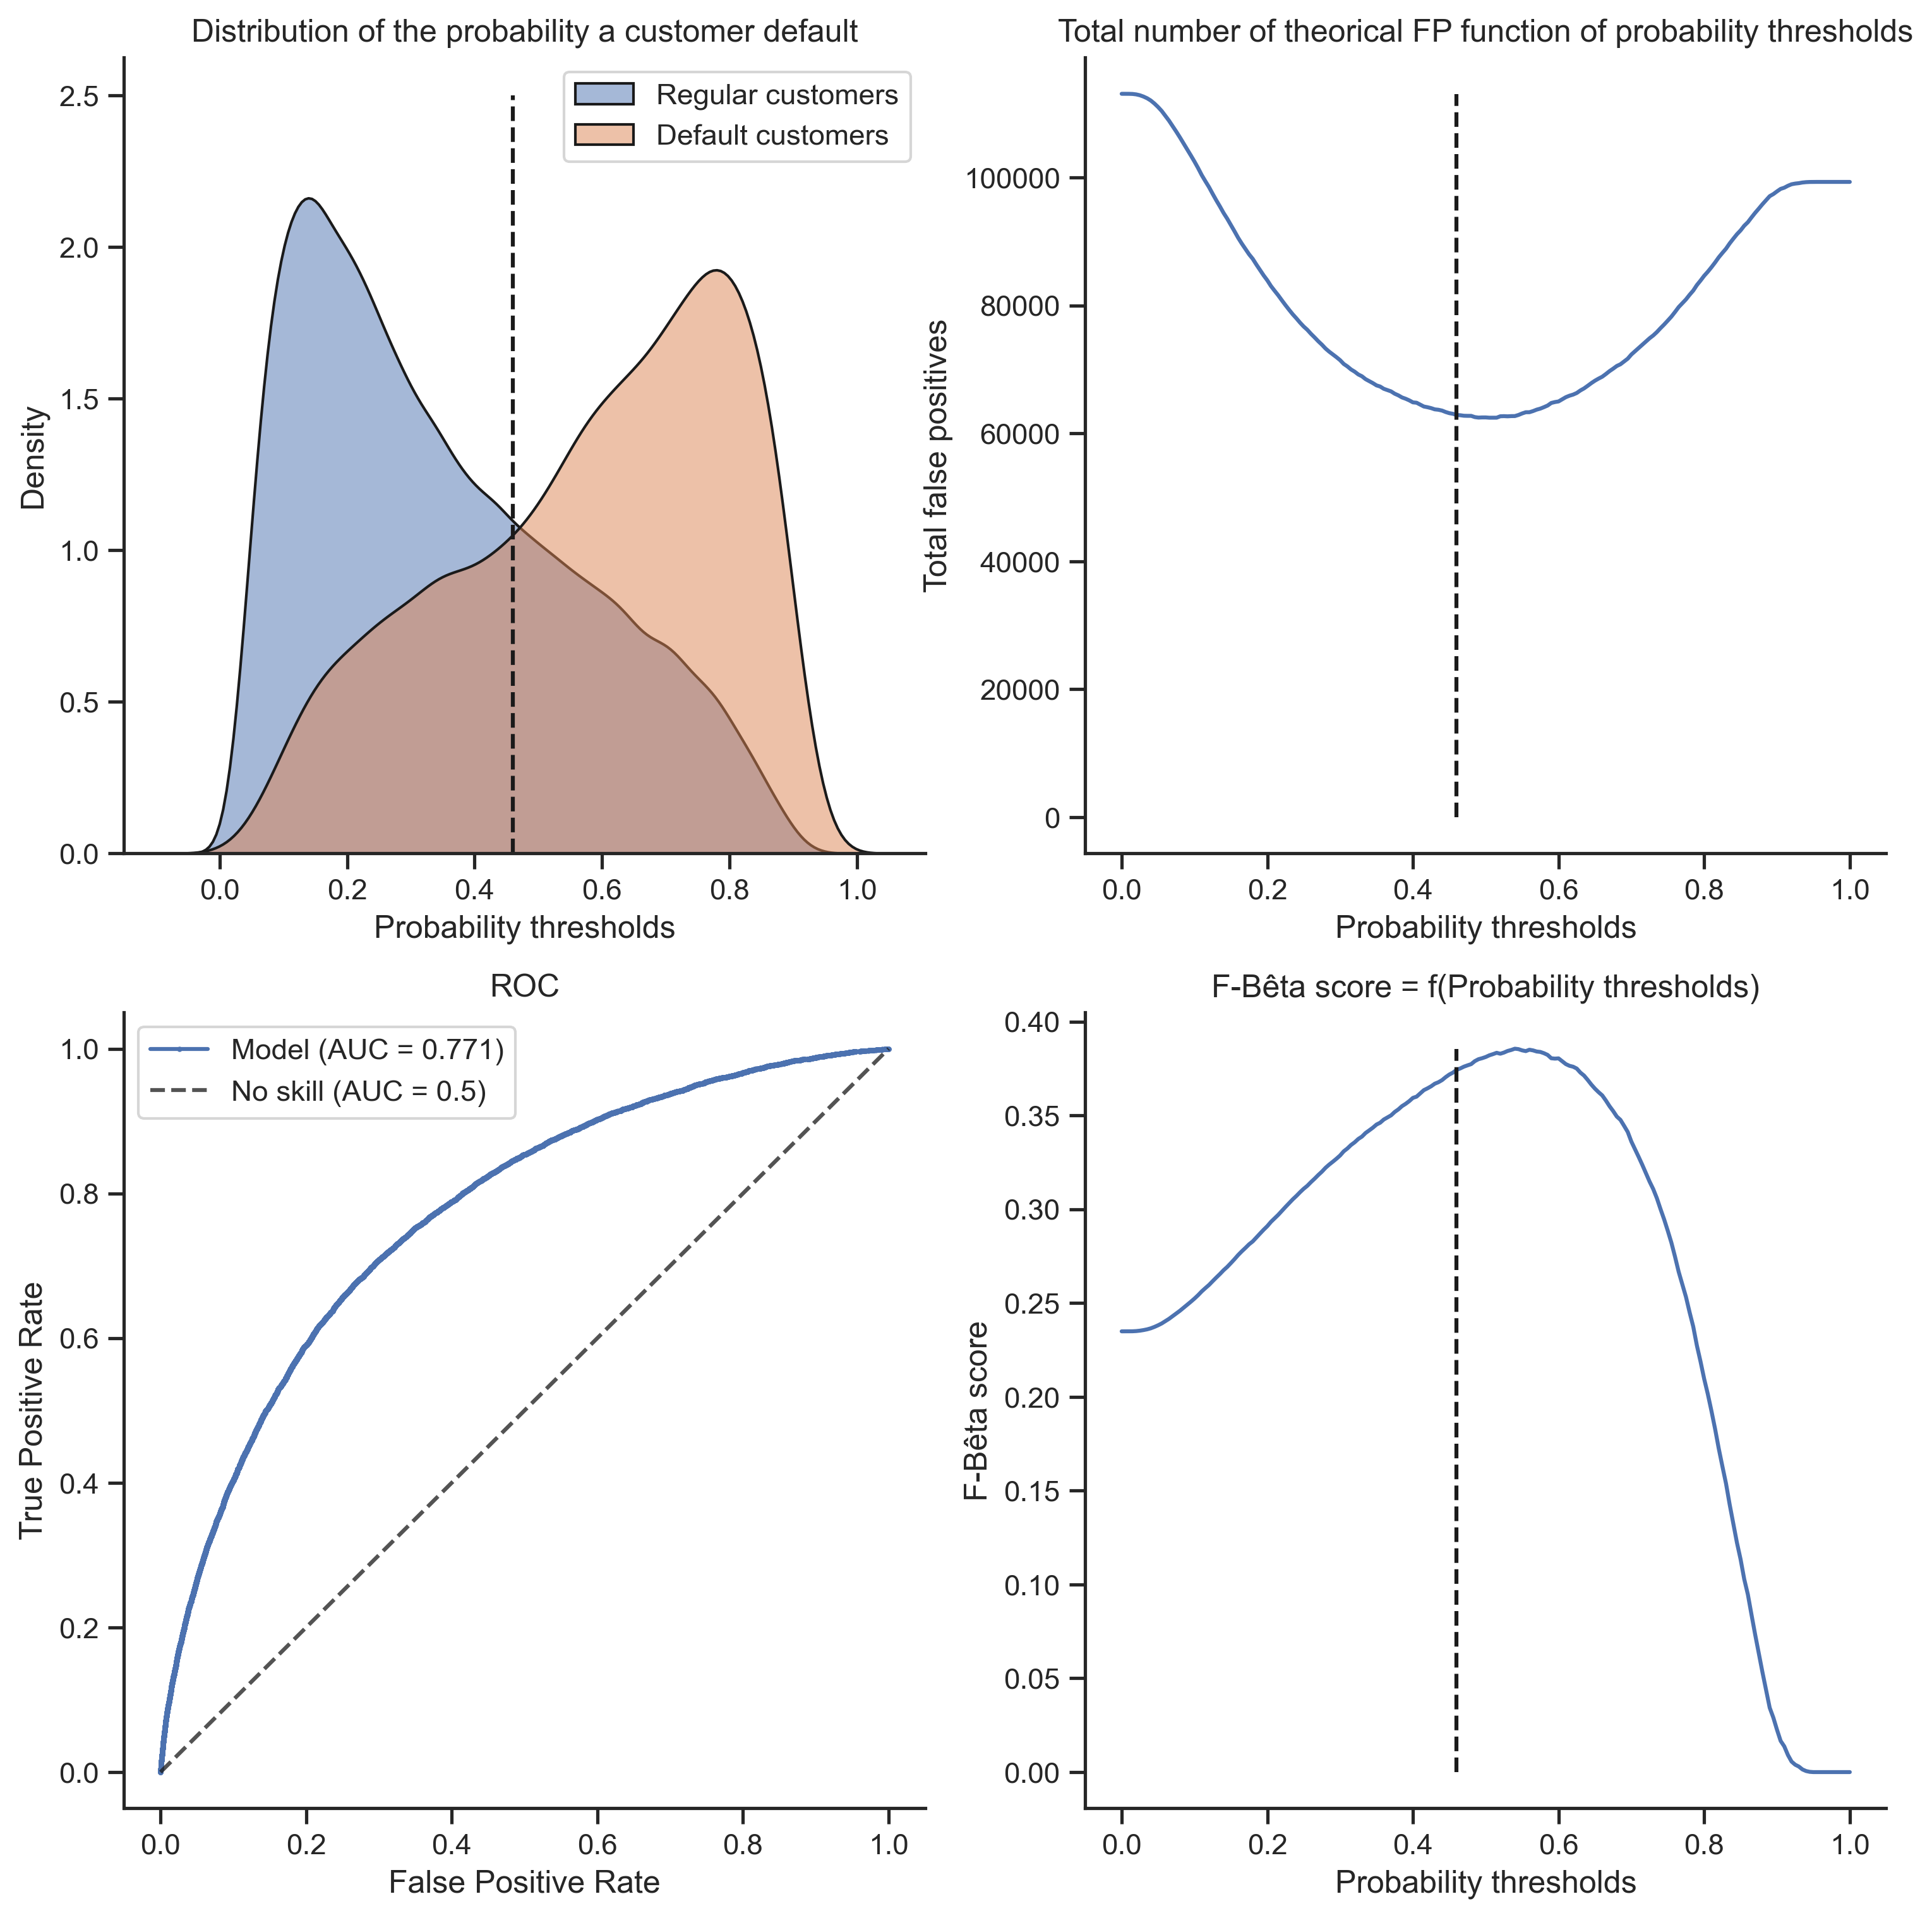

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models  \
Model_labels                                                                 
scl_wt_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
scl_wt_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
scl_wt_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
scl_wt_lgbm_clf_opt      (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                yhat_train  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.48581755097810747, 0.23034944946814004, 0.2...   
scl_wt_lgbm_clf_opt      [0.591950048973562, 0.23240067341337958, 0.338...   

                                                                 yhat_test  \
Model_labels                                                                 
scl_wt_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
scl_wt_logi_reg_clf_opt  [0.6163079988301373, 0.22490742748237588, 0.31...   
scl_wt_rf_clf_opt        [0.510608288075357, 0.16365170111395783, 0.243...   
scl_wt_lgbm_clf_opt      [0.591950048973562, 0.23240067341337958, 0.338...   

                         Best_proba_threshold_train  \
Model_labels                                          
scl_wt_dummy_clf                              1.000   
scl_wt_logi_reg_clf_opt                       0.500   
scl_wt_rf_clf_opt                             0.375   
scl_wt_lgbm_clf_opt                           0.460   

                         Best_proba_threshold_test  Job_score_train  \
Model_labels                                                          
scl_wt_dummy_clf                              1.00         0.532424   
scl_wt_logi_reg_clf_opt                       0.50         0.698680   
scl_wt_rf_clf_opt                             0.38         0.687007   
scl_wt_lgbm_clf_opt                           0.46         0.703991   

                         Job_score_test  AUROC_scores_train  \
Model_labels                                                  
scl_wt_dummy_clf               0.532424            0.499501   
scl_wt_logi_reg_clf_opt        0.698680            0.764734   
scl_wt_rf_clf_opt              0.687581            0.751657   
scl_wt_lgbm_clf_opt            0.703991            0.770568   

                         AUROC_scores_test  F-bêta_score_train  \
Model_labels                                                     
scl_wt_dummy_clf                  0.498437            0.078976   
scl_wt_logi_reg_clf_opt           0.764734            0.374797   
scl_wt_rf_clf_opt                 0.750971            0.365414   
scl_wt_lgbm_clf_opt               0.770568            0.385565   

                         F-bêta_score_test  Process_time_train (s)  \
Model_labels                                                         
scl_wt_dummy_clf                  0.077921                2.794142   
scl_wt_logi_reg_clf_opt           0.374797               18.540412   
scl_wt_rf_clf_opt                 0.366705             1728.167900   
scl_wt_lgbm_clf_opt               0.385565               11.207665   

                         Process_time_test (s)  \
Model_labels                                     
scl_wt_dummy_clf                      2.761036   
scl_wt_logi_reg_clf_opt              18.526587   
scl_wt_rf_clf_opt                  1720.082333   
scl_wt_lgbm_clf_opt                  10.769863   

                        Confusion_matrix_values_train ([TP, FP, FN, TN])  \
Model_labels                                                               
scl_wt_dummy_clf                                    [0, 0, 9930, 113072]   
scl_wt_logi_reg_clf_opt                       [6881, 33502, 3049, 79570]   
scl_wt_rf_clf_opt                             [7099, 38161, 2831, 74911]   
scl_wt_lgbm_clf_opt      

In [58]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### f) Models comparison

#### i. Functions

In [59]:
def figure_barplot (df, x_labels = 'Model_labels', y_label = 'Score', title = None):
    
    # Rearrange the df such as it fits the seaborn.barplot() data format.
    tidy = df.reset_index().melt(id_vars=x_labels, value_name=y_label, var_name='')
    
    # Plot the figure.
    ax = sns.barplot(data=tidy, y=x_labels, x=y_label, hue='', orient='h', edgecolor='k')
    
    #plt.ylabel = ' '
    
    # Set the figure title.
    plt.title(title)
    
    #return ax

#### ii. Figures

*__- ROCs comparison__*

Models comparison: No data transformation + Weight


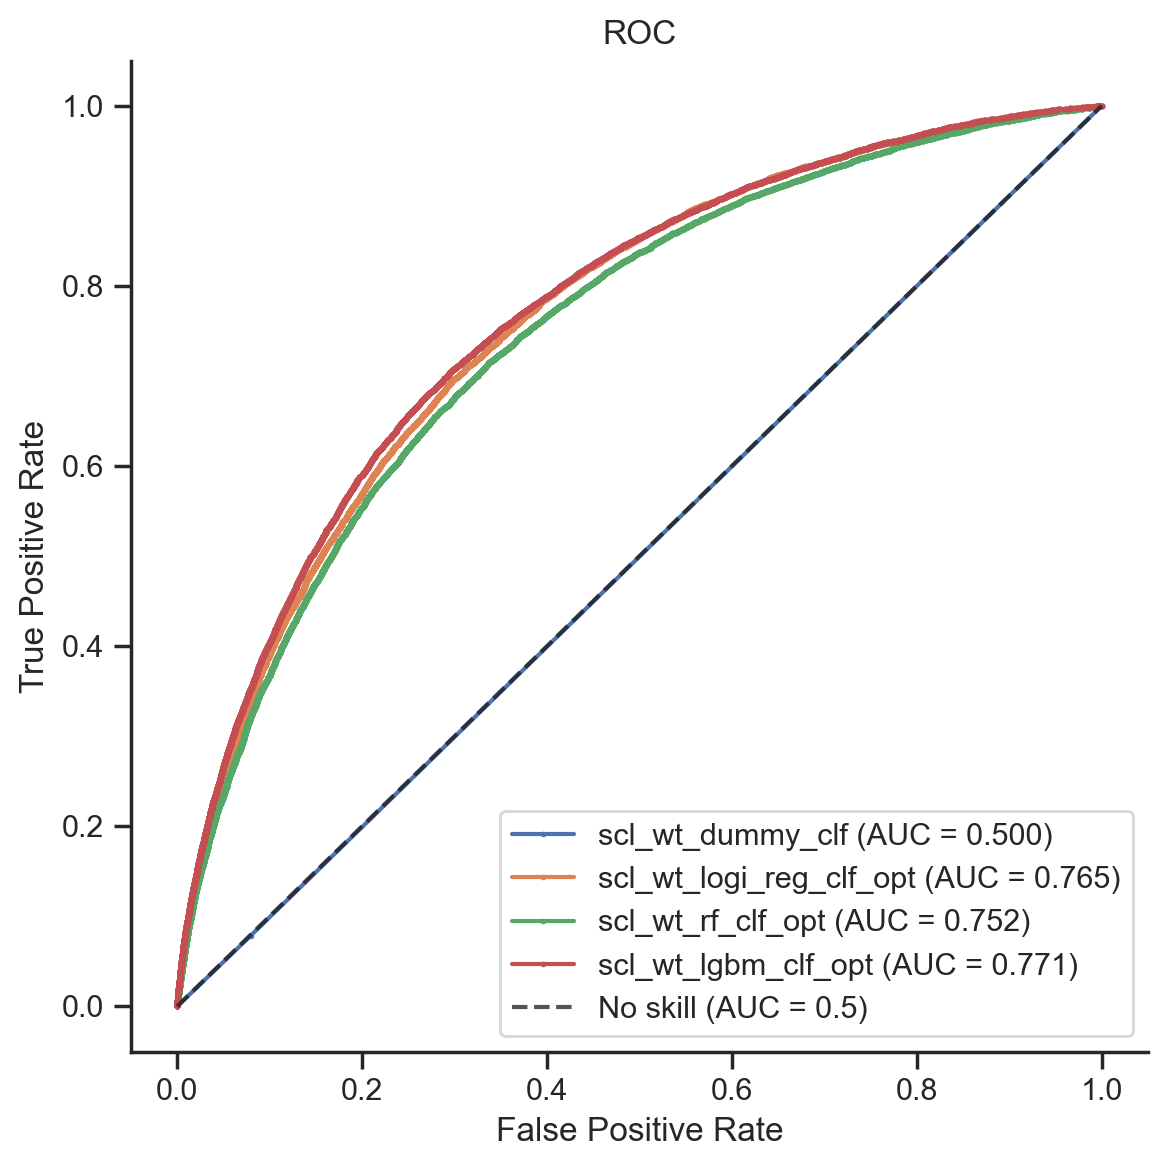

CPU times: total: 484 ms
Wall time: 487 ms


In [60]:
%%time

### Plot figures normalization, no normalization, data resampling ###

## Configuration ##

for j in np.arange(0, df_MODELS.shape[0], 5):
    
    # Set the whole figure title.
    if j < 5:
        print("Models comparison: No data transformation + Weight")
    elif j < 10:
        print("Models comparison: Normalization + Weight")
    elif j < 15:
        print("Models comparison: Normalization + Data resampling")
        
        
    ## Plotting the ROCs ##
    
    figure_roc(y_TRAIN, df_MODELS['yhat_train'], df_MODELS.index[j:j+5])


    ## Drawing ##

    # Arrange the subplots such as they are not superimposing each others. 
    plt.tight_layout()

    # Draw the figure.
    plt.show()

*__- Scores and processing times comparisons__*


----------------------------------------------------------------------------------------------------



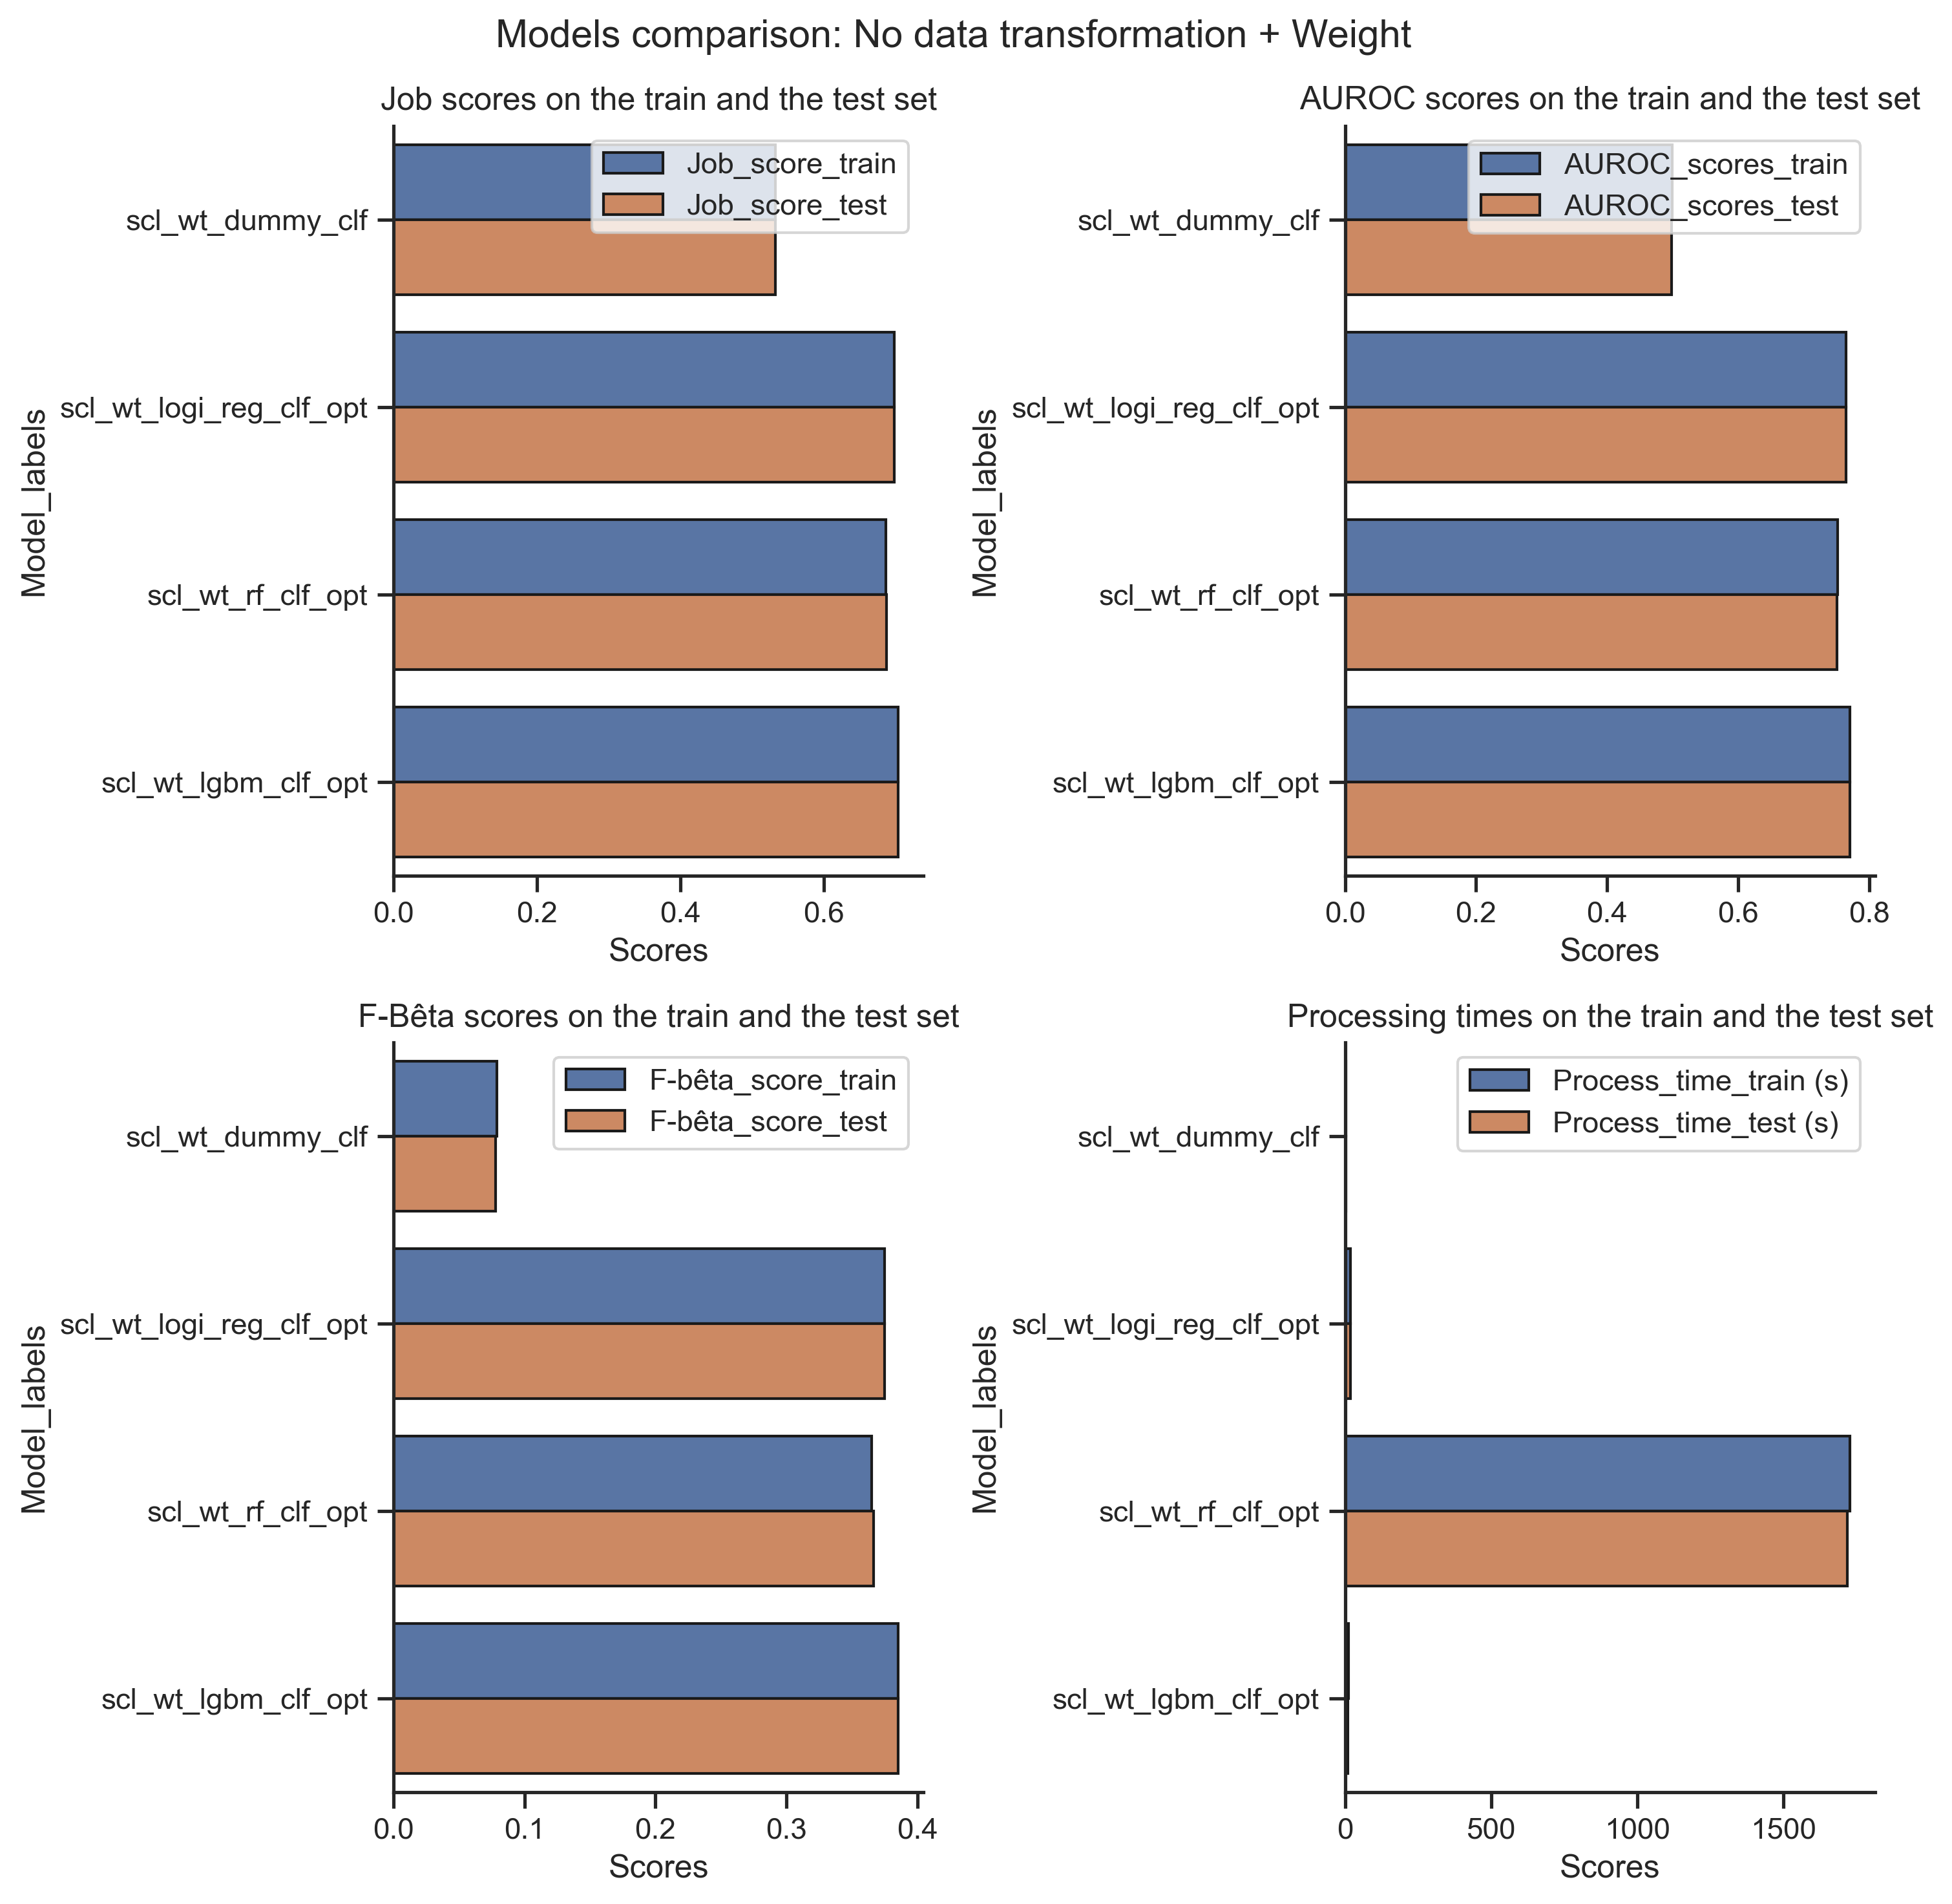

CPU times: total: 891 ms
Wall time: 881 ms


In [61]:
%%time

### Configuration ###

# Select the columns to compare.
l_features_peers = [
                    ['Job_score_train', 'Job_score_test'],
                    ['AUROC_scores_train', 'AUROC_scores_test'],
                    ['F-bêta_score_train', 'F-bêta_score_test'],
                    ['Process_time_train (s)', 'Process_time_test (s)']
                   ]

# Set each subplot titles.
l_subplot_titles = ["Job scores on the train and the test set",
                    "AUROC scores on the train and the test set",
                    "F-Bêta scores on the train and the test set",
                    "Processing times on the train and the test set"]

# Plot figures normalization, no normalization, data resampling.
for j in np.arange(0, df_MODELS.shape[0], 5):
    
    # Figures separator.
    print("\n" + "-" * 100 + "\n")
    
    # Set the figure environment.
    fig = plt.figure(figsize=(10,10), dpi=300)
    
    # Set the whole figure title.
    if j < 5:
        fig.suptitle("Models comparison: No data transformation + Weight")
    elif j < 10:
        fig.suptitle("Models comparison: Normalization + Weight")
    elif j < 15:
        fig.suptitle("Models comparison: Normalization + Data resampling")
        
    # Initialize the subplot grid (2 lines x 2 columns).
    l, c = int(len(l_features_peers) / 2), 2
    
    
    ### Plotting ###

    # Run the loop to draw and position each subplot on the figure's subplot grid.
    for i in range(len(l_features_peers)):

        # Get the columns and the subplot title to plot.
        features_peer = l_features_peers[i]
        subplot_title = l_subplot_titles[i]

        # Set the position of the subplot.
        p = i + 1
        plt.subplot(l, c, p)

        # Plot the subplot.
        figure_barplot(df_MODELS[features_peer].iloc[j:j+5],
                       x_labels = 'Model_labels', y_label = 'Scores',
                       title = subplot_title)


    ### Drawing ###

    # Arrange the subplots such as they are not superimposing each others. 
    plt.tight_layout()

    # Draw the figure.
    plt.show()